In [95]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
plt.style.use('seaborn')

# 导入数据

In [4]:
data = pd.read_csv(r"superstore_dataset2011-2015.csv",encoding = "ISO-8859-1")

## 查看数据

In [5]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


In [6]:
data.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

- 只有Postal Code存在缺失

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

English|dtype|中文
--|--|--|
Row ID   |           int64 |  #行编号
Order ID  |           object |  #订单ID
Order Date|        object  | #订单日期
Ship Date |         object |  #发货日期
Ship Mode  |        object |  #发货模式
Customer ID  |      object |  #客户ID
Customer Name  |    object |  #客户姓名
Segment      |      object |  #客户类别
City      |         object |  #客户所在城市
State   |           object |  #客户城市所在州
Country  |          object |  #客户所在国家
Postal Code  |     float64 |  #邮编
Market    |         object |  #market所属区域
Region   |          object |  #market所属州
Product ID  |       object  | #产品ID
Category     |      object  | #产品类别
Sub-Category |      object  | #产品子类别
Product Name |      object  | #产品名称
Sales      |       float64  | #销售额
Quantity   |         int64  | #销售量
Discount   |       float64  | #折扣
Profit    |        float64  | #利润
Shipping Cost |    float64  | #发货成本
Order Priority |    object  | #订单优先级

# 数据清洗

## Datatime格式转换

In [9]:
data.loc[:,"Order Date"] = pd.to_datetime(data.loc[:,"Order Date"])#虽然这列数据格式有两种，但是to_data函数能够直接解决

In [10]:
data.iloc[np.random.choice(data.shape[0],5)]#随机查看，看数据的时间是否都一样

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
46235,49253,CA-2014-6510,2014-05-28,1/6/2014,Standard Class,LS-7245,Lynn Smith,Consumer,North York,Ontario,...,OFF-SME-10001149,Office Supplies,Storage,"Smead Folders, Single Width",17.52,1,0.0,5.4300,1.54,Medium
31925,18288,ES-2014-1311351,2014-12-19,26-12-2014,Standard Class,JJ-15760,Joel Jenkins,Home Office,Kingswood,England,...,OFF-FA-10004799,Office Supplies,Fasteners,"Advantus Thumb Tacks, Bulk Pack",27.18,2,0.0,0.0000,2.13,Low
34316,5958,MX-2012-132038,2012-06-21,25-06-2012,Standard Class,TC-21145,Theresa Coyne,Corporate,Mexico City,Distrito Federal,...,FUR-TA-10003171,Furniture,Tables,"Bevis Training Table, Fully Assembled",897.20,5,0.2,123.3000,65.31,High
13893,34692,US-2014-148362,2014-02-07,9/7/2014,Standard Class,KF-16285,Karen Ferguson,Home Office,Indianapolis,Indiana,...,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",443.92,4,0.0,13.3176,0.55,Medium
13881,44524,EG-2014-950,2014-02-07,9/7/2014,Standard Class,RB-9705,Roger Barcio,Home Office,Cairo,Al Qahirah,...,OFF-BOS-10002073,Office Supplies,Art,"Boston Canvas, Water Color",56.82,1,0.0,8.5200,2.89,Medium


In [11]:
#按照日期排序
data_new = data.sort_values("Order Date",na_position='first')

In [12]:
#提取订单年、月字段
data_new["Year"] = data_new["Order Date"].dt.year
data_new["Month"]= data_new["Order Date"].dt.month

In [13]:
data_new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011,1
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011,1
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011,1
3,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,2011,1
4,22255,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51253,45582,AO-2014-7730,2014-12-31,4/1/2015,Standard Class,KL-6645,Ken Lonsdale,Consumer,Luanda,Luanda,...,Paper,"SanDisk Memo Slips, 8.5 x 11",126.720,6,0.0,20.1600,11.50,High,2014,12
51254,9475,MX-2014-158827,2014-12-31,2/1/2015,First Class,TC-21535,Tracy Collins,Home Office,Chaguanas,Chaguanas,...,Appliances,"Cuisinart Blender, Silver",135.480,3,0.0,17.5800,10.93,Medium,2014,12
51255,44026,RS-2014-1460,2014-12-31,2/1/2015,Second Class,PB-9105,Peter Bühler,Consumer,Ufa,Bashkortostan,...,Furnishings,"Rubbermaid Door Stop, Black",43.800,1,0.0,13.5600,9.81,High,2014,12
51242,7199,MX-2014-141712,2014-12-31,31-12-2014,Same Day,RB-19465,Rick Bensley,Home Office,Managua,Managua,...,Chairs,"Novimex Chairmat, Set of Two",78.120,2,0.0,35.9200,25.16,Critical,2014,12


In [14]:
#商品件单价
data_new["price"] = data_new["Sales"]/data_new["Quantity"]

## 删除缺失值

In [15]:
#前期看到缺失值只一个字段：邮编
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  object        
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

## 查看异常值


In [16]:
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2012.000000,2013.000,2014.0000,2014.000
Month,51290.0,7.143420,3.394749,1.000,4.000000,7.000,10.0000,12.000
price,51290.0,71.657487,113.581515,0.336,11.799900,29.400,82.1600,3773.080


In [17]:
data_new.describe(include="object").T

,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002


# 构建分析模型

## 整体运营情况分析
运用多维度拆解法，从
- 企业整体销售情况（销售额、利润额、利润率、增长率），
- 不同门店销售情况，
- 促销活动销售情况进行分析，

综合了解企业运营现状

### 企业整体销售情况

<Figure size 1440x216 with 0 Axes>

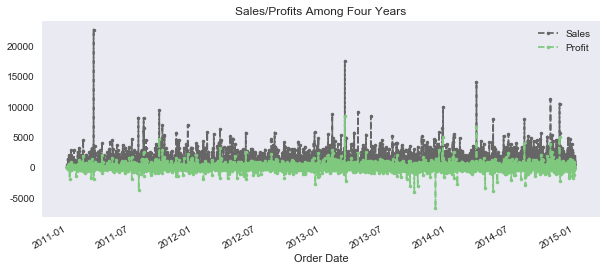

In [18]:
#整体浏览
fig=plt.figure(figsize=(20,3))
sales_tem=data_new[['Order Date','Sales','Profit']]
sales_tem.index=sales_tem['Order Date']
sales_tem[['Sales','Profit']].plot(kind='line',style='--g.',colormap='Accent_r',
                                  figsize=(10,4),title='Sales/Profits Among Four Years',);
plt.grid();
plt.savefig(r'Pic\01_fits Among Four Years.png')

#### 计算4年销售额、利润额、销量、利润率

In [19]:
data_sale = data_new.groupby("Year").sum()[["Sales",'Quantity','Profit']]
data_sale["ProfitRate(%)"]=data_sale['Profit']/data_sale['Sales']*100
# data_sale.plot.bar(colormap = 'Accent_r');
data_sale

,Sales,Quantity,Profit,ProfitRate(%)
Year,,,,
2011,2.259451e+06,31443,248940.81154,11.017757
2012,2.677439e+06,38111,307415.27910,11.481693
2013,3.405746e+06,48136,406935.23018,11.948489
2014,4.299866e+06,60622,504165.97046,11.725156


分析：通过以上计算结果和图表展示可以发现，超市2011-2014年每年业绩呈现上升趋势，销售额、利润额、销售量都在上升，销售额从2011年的226w到2014年的430w，说明经营在逐步稳定。但是从销售额对比亚马逊/沃尔玛这种大型超市，还是有一定差距.**同时发现2014年利润率同比下降0.22个点，有待进一步发现**

#### 销售额、利润额、销量、利润率的同比增长率

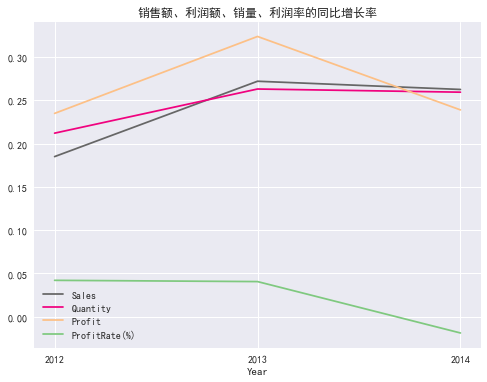

In [104]:
# 计算同比增长率
rate=data_sale.pct_change()
rate
rate.plot(colormap = 'Accent_r',
          title='销售额、利润额、销量、利润率的同比增长率',
         figsize=(8,6),
         xticks=[2012,2013,2014]);

In [105]:
rate

,Sales,Quantity,Profit,ProfitRate(%)
Year,,,,
2011,NaN,NaN,NaN,NaN
2012,0.184995,0.212066,0.234893,0.042108
2013,0.272017,0.263047,0.323731,0.040656
2014,0.262533,0.259390,0.238934,-0.018691


分析：
- 从增长率来看，销售额、利润额、销售量、利润率从11年到13年均在稳步提升，其中2013年销售额增长率达到了27.2%，从业绩增长率来看，对比沃尔玛公开数据显示（2012-2014年均增长率为4.5%），还是非常有竞争力的（但是沃尔玛的基数大，增长率会放缓，所以要结合销售额和增长率一起看）
- 发现二：14年的销售额、利润额、销售量、利润率的增长率相较13年，均有所回落。其中利润增长明显放缓，2014年利润增长率为23.9%（2013年为32.4%，），同时比2014年销售额增长率（26.25%）低，猜测和14年促销活动让利过多导致利润下降（后续在分析促销活动时会进行验证）。
- 此外，结合年度销售额/利润额/销量及增长率，再结合公司整体战略规划，可以预测或制定下一年度总销售额业绩指标

> 了解了超市整体销售额/利润/销量情况后，接下来对每年每月的销售额进行分析，了解不同月份的销售情况，找出是否有淡旺季之分，找出重点销售月份，以便制定经营策略与业绩月度及季度指标拆分

#### 计算每年每月销售额、利润额、销量、增长率

In [21]:
#每月销售额/利润额/销量
data_sale_month=pd.pivot_table(data_new,index='Month',columns='Year',values=['Sales','Profit','Quantity'],aggfunc='sum')
data_sale_month

Profit                                        Quantity        \
Year          2011         2012         2013         2014     2011  2012   
Month                                                                      
1      13457.23302  19627.42058  26052.40252  31447.74660     2178  2150   
2      17588.83726  17828.18244  31553.99756  29454.01876     1794  2156   
3      16169.36062  22752.87684  34873.71938  50097.04458     2183  2880   
4      13405.46924  20804.00532  26008.05144  35709.53320     2181  2506   
5      14777.45792  22865.39572  39053.30946  34335.60404     2057  3239   
6      25932.87796  34358.03962  43298.85000  40869.02108     2715  3508   
7      10631.84406  21725.18808  27019.91294  26450.70856     2266  2551   
8      19650.67124  36511.44996  32977.75576  46443.47934     2909  3451   
9      32313.25458  25039.93498  18850.09084  52533.83284     3357  3752   
10     30745.54166  27773.87454  27871.97470  52342.49740     2615  3399   
11     21261.40536  26160.60686  51720.88568  55561.72406     3165  4497   
12     33006.85862  31968.30416  47654.27990  48920.76000     4023  4022   

                          Sales                                            
Year   2013  2014          2011          2012          2013          2014  
Month                                                                      
1      2766  3656  138241.30042  162800.89338  206459.19582  268265.52240  
2      2535  3450  134969.94086  152661.15144  191062.77216  244159.30486  
3      3130  4820  171455.59372  201608.72784  230547.79468  347720.96868  
4      3161  4397  128833.47034  187469.96192  233181.34844  302132.54000  
5      4115  4415  148146.72092  218960.16042  304509.96336  304798.83604  
6      4948  5528  189338.43966  249289.77172  341162.34370  372577.23298  
7      3594  3867  162034.69756  174394.02808  223642.65664  278672.17326  
8      4564  5506  219223.49524  271669.66086  323876.60716  432731.04194  
9      5067  5741  255237.89698  256567.85308  326897.27044  405436.70584  
10     3977  5915  204675.07846  239321.09904  270121.87570  406659.41500  
11     5274  7020  214934.29386  270723.05356  383039.21248  508954.73156  
12     5005  6307  292359.96752  291972.33306  371245.40880  427757.39800

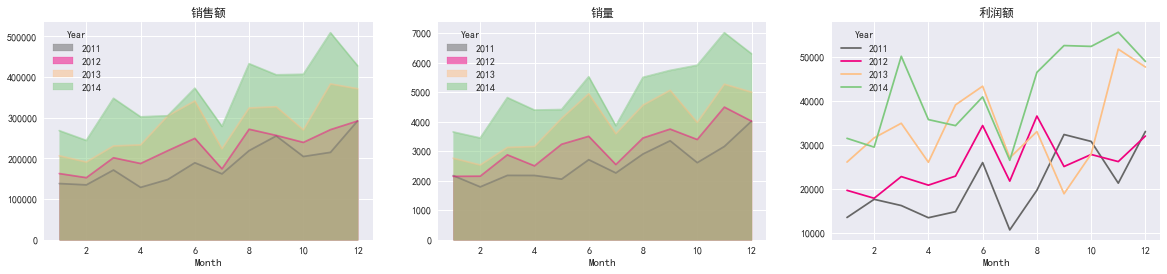

In [107]:
#每月销售额/销量/利润额堆叠图
fig,axes = plt.subplots(1,3,figsize = (20,4))
data_sale_month['Sales'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[0],title='销售额');
data_sale_month['Quantity'].plot.area(colormap = 'Accent_r',stacked=False,ax=axes[1],title='销量') ; 
data_sale_month['Profit'].plot(colormap = 'Accent_r',ax=axes[2],title='利润额');
plt.savefig(r'Pic\02_03.png')

分析：从以上表格与图表显示可以大致看出，该超市的销售季节性还是挺明显的，总体上半年是淡季，下半年是旺季，同时销售额和销量同比上一年均再提高。上半年中总体6月份销售额/销量/利润额是比较高的，下半年中7月份的销售额/销量/利润额是偏低的。

- 对于旺季的月份，运营推广等策略要继续维持，还可以加大投入，提高整体销售额
- 对于淡季的月份，可以结合产品特点进行新产品拓展，举办一些促销活动等吸引客户


In [23]:
#计算每月同比增长率
data_sale_month_all=pd.concat([data_sale_month['Sales'].pct_change(axis='columns'),rate[["Sales"]].T])

In [143]:
#画图
data_sale_month_all.style.background_gradient(cmap='BuGn',axis =1,low=0,high=1)

Year,2011,2012,2013,2014
Month,,,,
1,nan,0.177657,0.268170,0.299363
2,nan,0.131075,0.251548,0.277901
3,nan,0.175866,0.143541,0.508238
4,nan,0.455134,0.243833,0.295698
5,nan,0.477995,0.390709,0.000949
6,nan,0.316636,0.368537,0.092082
7,nan,0.076276,0.282399,0.246060
8,nan,0.239236,0.192171,0.336098
9,nan,0.005211,0.274116,0.240257


In [113]:
data_sale_month_all.index.name="Month"


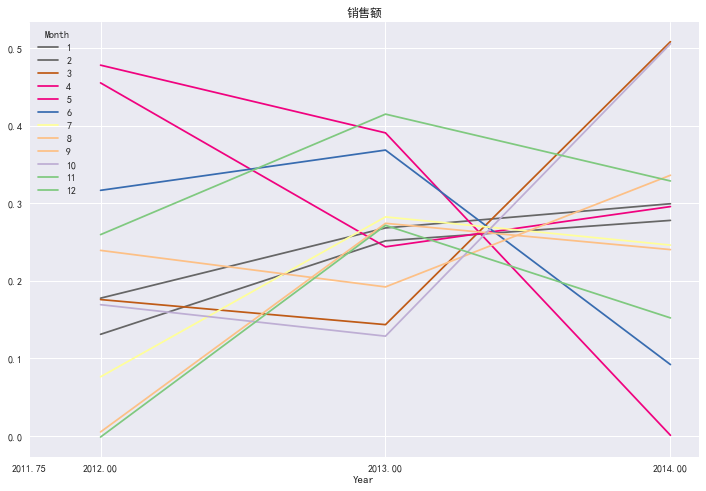

In [140]:
data_sale_month_all.drop("Sales").stack().unstack(-2).plot(colormap = 'Accent_r',
                                                           stacked=False,
                                                           title='销售额',
                                                          figsize=(12,8),
                                                          xticks=[2011.75,2012,2013,2014],
                                                          );

分析：从表格显示，首先，几乎所有的月份同比前一年都是增长的，只有2012年12月份是呈现负增长了，这个需要结合当时运营情况来具体情况具体分析。其次，结合年度销售额增长率来看，每年月度销售额增长率超过年度增长率的月份分布，基本没有什么规律；第三，同比增长率目前来看，没有太大规律，这给下一年拆分业绩指标其实增加了一定难度。

但是会发现基本每个月份都是有同比增长率很高的（12年的4、5、6月；13年的5、6、11月；14年的3、8、10、11），说明对于每个月的经营提高策略都有一定的把握了，后续经营会更加顺手。

### 市场布局

#### 不同门店销售情况

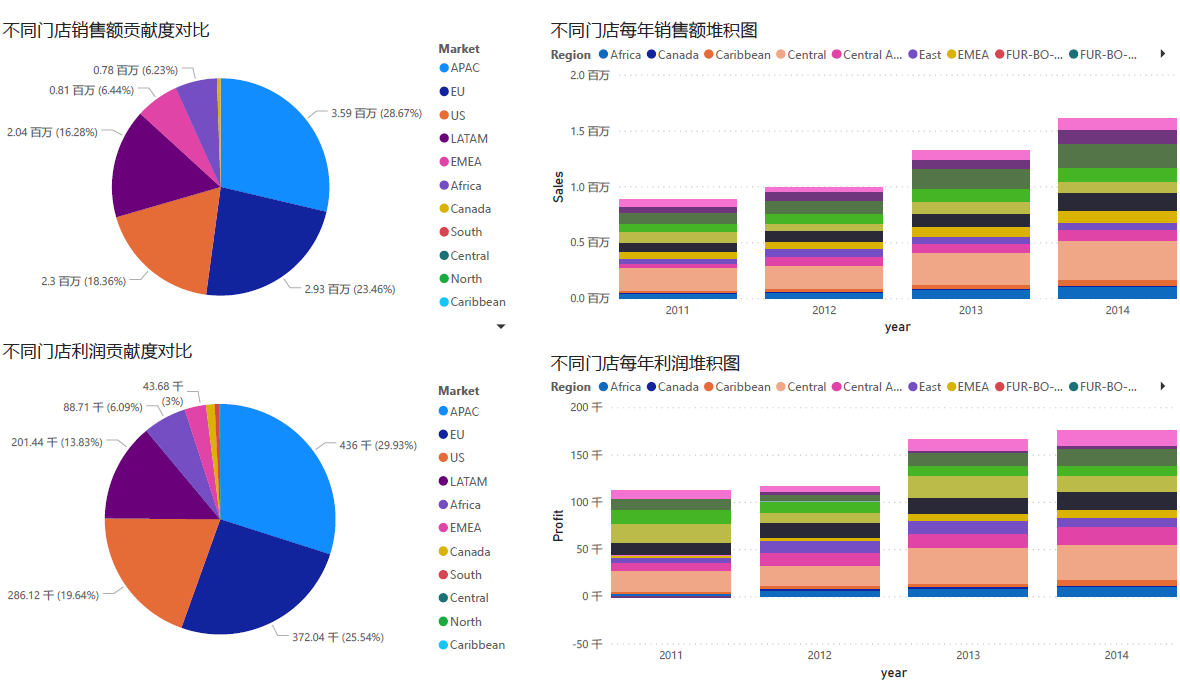

分析：从以上图表可以看出，每家market总体每年销售额均处于上升趋势，其中APAC(亚太地区)、EU(欧盟)、US(美国)、LATAM(拉丁美洲)的market占到了总销售额的89%，总体也与地区的经济发展相匹配。

其中加拿大Canada的销售额微乎其微，且增长率相较于其他门店，并没有表现优异，可以结合公司整体战略布局进行取舍。

### 区位维度

首先提取出一张客户ID及其国家的关系表:

In [25]:
sales_country = data_new.drop_duplicates(subset=['Customer ID', 'Country'])[['Customer ID', 'Country']]

按客户分组，计算消费总额：

In [26]:
country_grouped = data_new.groupby('Customer ID')[['Profit']].sum()

将上述两张表合并：

In [27]:
country_grouped = country_grouped.merge(sales_country, on=['Customer ID'])

按国家再次分组，计算出各国客户的消费总额和客户总数：

In [28]:
country_grouped = country_grouped.groupby('Country').agg({'Profit': np.sum, 'Customer ID': np.size})

新增AvgAmount字段，用于存放该国家客户的人均消费金额：

In [29]:
country_grouped['AvgAmount'] = country_grouped['Profit'] / country_grouped['Customer ID']

In [30]:
country_grouped['ProfitRate(%)'] = country_grouped['Profit'] / (country_grouped['Profit'].sum())*100

对消费总额降序排列：

In [31]:
country_grouped.sort_values(by = 'Profit',ascending = False).head(10)  

,Profit,Customer ID,AvgAmount,ProfitRate(%)
Country,,,,
United States,1.314342e+06,793,1657.430490,6.532341
France,1.134039e+06,679,1670.160191,5.636224
Australia,1.117832e+06,660,1693.684210,5.555673
Mexico,1.113621e+06,670,1662.121476,5.534748
Germany,1.025765e+06,582,1762.482653,5.098098
China,9.585643e+05,549,1746.018813,4.764108
United Kingdom,9.400767e+05,529,1777.082613,4.672223
India,8.574397e+05,494,1735.707891,4.261514
Indonesia,7.984044e+05,469,1702.354733,3.968106


通过以上图表可以发现，美国、法国、澳大利亚、墨西哥、德国、中国、英国、印度、均出现在销售额和利润额贡献top10国家中，从人均利润与各国利润占比发现英国人均利润最高，但是全国利润占比排第7，可扩大用户群，增加营收。利润占比前几的国家中大多数为英语为母语的国家，建议网站做好多国语言的适配，也可以在网站上对于境外物流费用计算及手续办理等事项给出更易懂的说明。

### 促销活动销售情况分析（促销活动对于企业的贡献）

最后再来看一下促销对于销售额及利润的影响，基于前面的分析，我们预估2014年销售额增长率及利润增长率略有下降，猜测和促销有很大的联系，这里来验证一下。

In [32]:
#创建子表
data_discount=data_new[['Year','Month','Sales','Profit','Quantity','Discount']]

In [33]:
data_discount.loc[:,"NoDiscount"]=(data_discount.loc[:,"Discount"]==0)
profit_discount_month=pd.pivot_table(data_discount,values='Profit',index="NoDiscount",columns='Year',aggfunc='sum')  
profit_discount_month.index=["discount","no discount"]
profit_discount_month.columns.name="Profit_Year"
profit_discount_month

D:\ProgramEncode\Anaconda3\envs\tensorflow3.7\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ProgramEncode\Anaconda3\envs\tensorflow3.7\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Profit_Year,2011,2012,2013,2014
discount,-57817.76496,-57752.4075,-89018.00972,-98649.79974
no discount,306758.57650,365167.6866,495953.23990,602815.77020


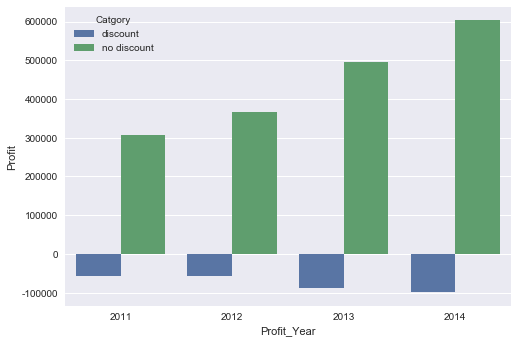

In [34]:
temp2=profit_discount_month.stack().reset_index().rename(columns={0:"Profit",
                                                               'level_0':'Catgory'})
sns.barplot(x="Profit_Year", y="Profit", hue="Catgory", data=temp2);

> no discount表示没有打折，discount表示打折

基于前面的分析，我们预估2014年销售额增长率及利润增长率略有下降，猜测和促销有很大的联系，这里来验证一下。

In [35]:
HaveDiscount = pd.pivot_table(data_discount[data_discount["NoDiscount"]== 0],index='Month',columns='Year',values=['Sales','Profit'],aggfunc='sum')
NotHaveDiscount = pd.pivot_table(data_discount[data_discount["NoDiscount"]== 1],index='Month',columns='Year',values=['Sales','Profit'],aggfunc='sum')

In [36]:
dis_PS=HaveDiscount[[('Profit',2014),('Sales',2014)]].stack().reset_index(-1)[['Profit','Sales']]
Notdis_PS=NotHaveDiscount[[('Profit',2014),('Sales',2014)]].stack().reset_index(-1)[['Profit','Sales']]
all_PS=pd.merge(dis_PS,Notdis_PS,left_index=True,right_index=True,suffixes=('_Discount',''))

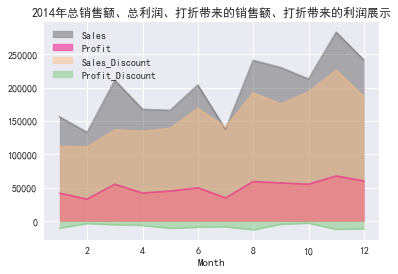

In [144]:
all_PS.reset_index().plot.area(x="Month",y=['Sales','Profit','Sales_Discount','Profit_Discount'],colormap = 'Accent_r',stacked=False,
                               title='2014年总销售额、总利润、打折带来的销售额、打折带来的利润展示');

**分析**：打折活动确实能够有效带动整体销售额，从以上图可以看出，14年打折损失的利润确实比前几年高，也验证了前面提到了14年利润增长率降低的原因猜想。从右图展示也可以看到，14年12月份年底可能是冲业绩，打折力度非常大。

打折的好与坏要分多方面来看，一方面利润确实有损，但是也要看到打折带来的销售额的增加，以及通过打折活动为企业带来了新的客户等，这些就涉及到ROI投资回报率计算

## 商品结构分析

对超市整体运营情况有一定了解后，再来看一下销售商品分析，了解整体产品结构，及高贡献产品

先了解一下不同产品各自的销售情况，根据对产品类别Category和子类别Sub-Category做groupby分组求和后得图表如下

### 不同产品销售额及利润对比分析

In [38]:
#根据对产品类别Category和子类别Sub-Category做groupby分组求和后得图表如下
product_SP=data_new.groupby(['Category','Sub-Category']).sum()[['Sales','Profit']].reset_index()
product_SP['name']=product_SP['Category']+'/'+product_SP['Sub-Category']
product_SP=product_SP.sort_values("Sales",ascending=False)

<BarContainer object of 17 artists>

<BarContainer object of 17 artists>

Text(0, 0.5, 'Sales/Profit')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

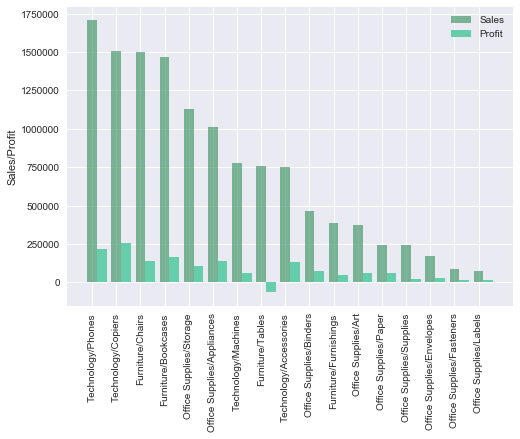

In [39]:
#画图ing
name_list = list(product_SP['name'])
num_list = list(product_SP['Sales'])
num_list1 = list(product_SP['Profit'])
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
fig=plt.figure()
ax1=fig.add_subplot(111)
#画销量图 
ax1.bar(x, num_list, width=width, label='Sales',tick_label = name_list,fc = 'seagreen',alpha=0.6);
#画利润柱状图
for i in range(len(x)):
    x[i] = x[i] + width
ax1.bar(x, num_list1, width=width, label='Profit',fc = 'mediumaquamarine');
ax1.set_ylabel('Sales/Profit')

plt.xticks(rotation=90)    # 设置x轴标签旋转角度
plt.legend()
plt.show()

分析：从图表中可以很清晰的看到不同产品的销售额贡献对比，可以判断出furniture(家具)中Bookcases(书柜)、Chairs(椅子)、Tables(桌子)，Office supplies(办公用品)中Appliances(电器)、Storage(储藏箱)，Technology(电子技术产品)中Accessories(附件)、Copiers(复印机)、Machines(机器)、Phones(电话/手机)，是整体产品中销售比较好的。

从著名的帕累托二八法则分析也可以看出，这几款产品的总销售占比达到84%，应该是自家优势主营产品，后续经营中应继续保持，可以结合整体战略发展适当加大投入，逐渐形成自己的品牌。

同时，也可以发现，末尾占比16%的产品中，Binders(粘合剂)、Furnishings(家具)、Art(艺术品)、Paper(纸)、Supplies(供应品)、Envelopes(信封)、Fasteners(紧固件)、Labels(标签)均是办公用品中的小物件。可以与其他主营产品结合，连带销售。

但是值得关注的是，Tables(桌子)的利润是负，表明这个产品目前处于亏损状态，应该是促销让利太多。通过检查原数据，发现Tabels大部分都在打折，打折的销量高达76%。如果是在清库存，这个效果还是不错的，但如果不是，说明这个产品在市场推广上遇到了瓶颈，或者是遇到强竞争对手，需要结合实际业务进行分析，适当改善经营策略

In [149]:
(product_SP['Sales']/(product_SP['Sales'].sum())).cumsum()

16    0.135007
14    0.254401
1     0.373181
0     0.489184
11    0.578335
4     0.658308
15    0.719931
3     0.779811
13    0.839075
6     0.875611
2     0.906110
5     0.935542
10    0.954865
12    0.974091
7     0.987610
8     0.994194
9     1.000000
Name: Sales, dtype: float64

### 商品维度

根据观察，发现相同的商品在不同的订单中单价不同，可知商品的单价会发生波动，以商品'OFF-AR-10003651'为例：

In [54]:
data_new[(data_new['Product ID']=='OFF-AR-10003651')&(data_new['Quantity']==3)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,price,Date
50430,10364,ES-2011-5287434,2011-03-31,4/4/2011,Standard Class,SA-20830,Sue Ann Reed,Consumer,Newcastle upon Tyne,England,...,34.110,3,0.0,7.8300,3.77,High,2011,3,11.370,31
41176,20268,ES-2011-5483343,2011-08-25,29-08-2011,Standard Class,TS-21205,Thomas Seio,Corporate,Paisley,Scotland,...,34.110,3,0.0,7.8300,4.80,High,2011,8,11.370,25
31130,15696,IT-2011-4311428,2011-09-19,24-09-2011,Standard Class,Dp-13240,Dean percer,Home Office,Cumbernauld,Scotland,...,81.270,3,0.0,40.5900,6.23,Medium,2011,9,27.090,19
3501,35262,CA-2011-164910,2011-12-11,17-11-2011,Second Class,DM-13345,Denise Monton,Corporate,Asheville,North Carolina,...,7.872,3,0.2,0.8856,1.02,Medium,2011,12,2.624,11
50161,31602,CA-2011-130960,2011-12-30,4/1/2012,Standard Class,KB-16600,Ken Brennan,Corporate,Taylor,Michigan,...,9.840,3,0.0,2.8536,1.20,High,2011,12,3.280,30
8860,14623,ES-2013-2003988,2013-03-09,8/9/2013,Second Class,NM-18445,Nathan Mautz,Home Office,Aix-en-Provence,Provence-Alpes-Côte d'Azur,...,81.270,3,0.0,40.5900,5.02,High,2013,3,27.090,9
20674,13434,ES-2013-2732869,2013-06-13,19-06-2013,Standard Class,AB-10165,Alan Barnes,Consumer,Bournemouth,England,...,34.110,3,0.0,7.8300,2.50,Medium,2013,6,11.370,13
12219,20264,ES-2013-4142253,2013-11-02,17-02-2013,Standard Class,PF-19120,Peter Fuller,Consumer,Parla,Madrid,...,81.270,3,0.0,40.5900,6.21,Medium,2013,11,27.090,2
14817,14876,ES-2014-4318151,2014-03-12,7/12/2014,Standard Class,BT-11305,Beth Thompson,Home Office,Cologne,North Rhine-Westphalia,...,81.270,3,0.0,40.5900,5.85,Medium,2014,3,27.090,12
37493,40543,CA-2014-130106,2014-05-23,27-05-2014,Standard Class,VF-21715,Vicky Freymann,Home Office,San Francisco,California,...,9.840,3,0.0,2.8536,1.66,High,2014,5,3.280,23


所以接下来求每件商品的平均价格，思路是平均价格=该商品的总销售额 / 该商品的销售数量。具体来说，先按商品编号进行分组，对数量和总价分别求和，即得到对应商品的总销售金额和总销售量，取商即得到平均价格：

In [55]:
goods_grouped = data_new.groupby('Product ID')[['Quantity', 'Sales']].sum()
goods_grouped['AvgPrice'] = goods_grouped['Sales'] / goods_grouped['Quantity']
goods_grouped.head()

,Quantity,Sales,AvgPrice
Product ID,,,
FUR-ADV-10000002,3,159.120,53.040000
FUR-ADV-10000108,7,350.070,50.010000
FUR-ADV-10000183,31,974.832,31.446194
FUR-ADV-10000188,7,124.950,17.850000
FUR-ADV-10000190,2,222.360,111.180000


查看所有商品AvgPrice的分布，观察这家店的价格定位：

Text(0.5, 1.0, 'AvgPrice Distribution')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'AvgPrice')

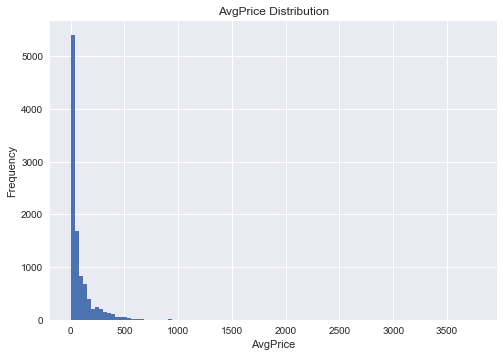

In [56]:
goods_grouped.AvgPrice.hist(bins=100)
plt.title('AvgPrice Distribution')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')

发现商品价位基本上全部集中在250美元内，出现了极少量的天价商品影响观测，将其筛去：

Text(0.5, 1.0, 'AvgPrice Distribution (Below 250)')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'AvgPrice')

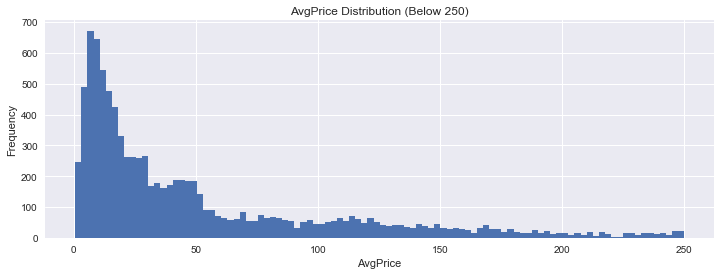

In [57]:
goods_grouped[goods_grouped.AvgPrice < 250].AvgPrice.hist(bins=100,figsize = (12, 4))
plt.title('AvgPrice Distribution (Below 250)')
plt.ylabel('Frequency')
plt.xlabel('AvgPrice')

峰值是10美元左右，单价200美元以上的商品已经很少见，看来该零售商的定位主要是价格低的中小商品市场。

<Figure size 1008x288 with 0 Axes>

Text(0.5, 1.0, 'AvgPrice & Quantity')

Text(0, 0.5, 'Quantity')

Text(0.5, 0, 'AvgPrice')

Text(0.5, 1.0, 'AvgPrice & Quantity (AvgPrice < 50)')

Text(0, 0.5, 'Quantity')

Text(0.5, 0, 'AvgPrice')

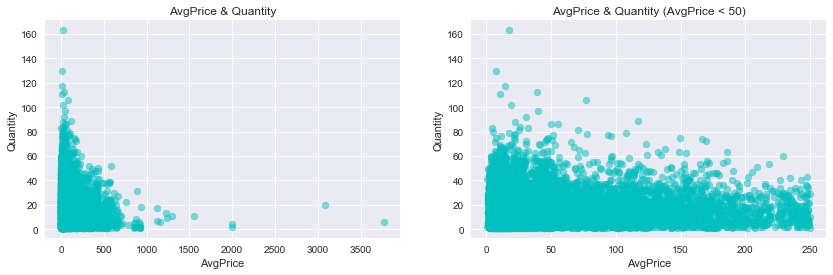

In [58]:
# 商品单价和销售数量的散点图
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(goods_grouped['AvgPrice'], goods_grouped['Quantity'], color = 'c',alpha=0.5)
plt.title('AvgPrice & Quantity')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

plt.subplot(122)
plt.scatter(goods_grouped[goods_grouped.AvgPrice < 250]['AvgPrice'], goods_grouped[goods_grouped.AvgPrice < 250]['Quantity'], color = 'c',alpha=0.5)
plt.title('AvgPrice & Quantity (AvgPrice < 50)')
plt.ylabel('Quantity')
plt.xlabel('AvgPrice')

低价区的商品笑到了最后，不仅在销售数量上一骑绝尘，也构成了销售额的主要部分；高价的商品虽然单价高昂，但销量很低，并没有带来太多的销售额。据此，建议平台采购部门可以多遴选售价低于250美元的产品，来进一步扩充低价区的品类。

## 客户行为数据分析

### 订单维度

1.订单维度：笔单价和连带率是多少？订单金额与订单内商品件数的关系如何？

In [40]:
#在data_new 添加天这一列
data_new["Date"] = data_new["Order Date"].dt.day    

首先将data_new按订单号分组，对Quantity商品数量和Sales销售额分组求和：

In [41]:
orderid_grouped=data_new.groupby('Order ID')[['Quantity','Sales']].sum()

通过describe获得笔单价（每笔订单的平均交易金额）和连带率（每笔订单平均购买的产品件数）：

In [189]:
# 笔单价 与 连带率
# 笔单价 = 总销售额 / 总笔数
# 连带率 = 售出商品总数 / 总笔数
orderid_grouped.describe()
# orderid_grouped.plot.box(title="hua tu")

,Quantity,Sales
count,25035.000000,25035.000000
mean,7.122508,504.993086
std,6.156871,807.070936
min,1.000000,0.556000
25%,3.000000,63.509250
50%,5.000000,206.820000
75%,9.000000,615.575100
max,58.000000,23661.228000


统计区间（2011年1月1日-2014年12月31日）内共产生有效订单25035笔，笔单价为504.99美元，连带率约为7件，说明以大型零售性质的订单为主。订单交易金额和订单内商品件数，其均值都高于中位数，订单交易金额接近于Q3分位数。说明订单总体差异大，存在部分购买力极强的客户。

Text(0.5, 1.0, 'Sales Distribution of Orders')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Sales')

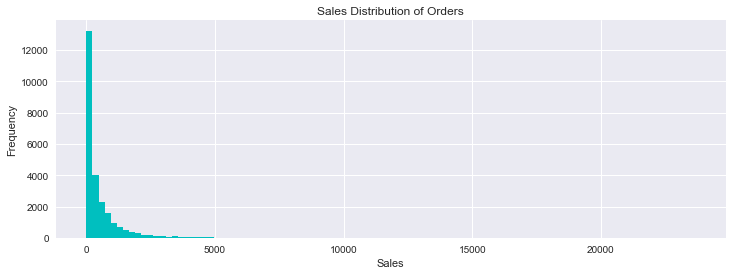

In [43]:
orderid_grouped['Sales'].hist(bins=100,figsize=(12,4),color='c')
plt.title('Sales Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('Sales')

部分订单交易金额过大，影响图表的可读性，筛去1000美元及以上的订单

Text(0.5, 1.0, 'Sales Distribution of Orders (Below 1000)')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Sales')

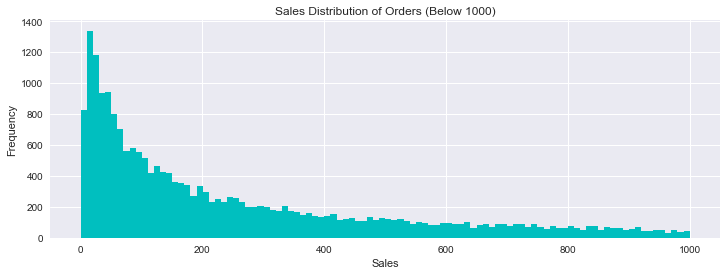

In [44]:
orderid_grouped[orderid_grouped.Sales < 1000]['Sales'].hist(bins = 100, figsize = (12, 4), color = 'c')
plt.title('Sales Distribution of Orders (Below 1000)')
plt.ylabel('Frequency')
plt.xlabel('Sales')

订单金额分布呈现单峰长尾形态，金额更为集中，峰值在20-30美元间。

对订单内商品数量的分布同样绘制柱形图：

Text(0.5, 1.0, 'Quantity Distribution of Orders')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Quantity')

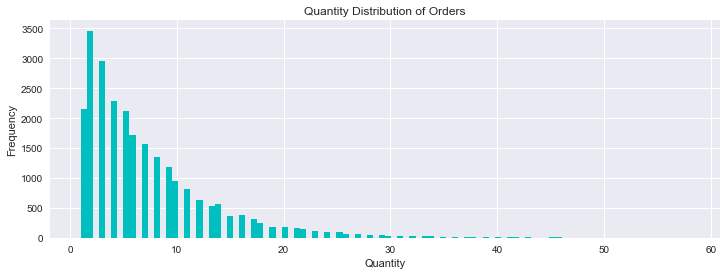

In [45]:
orderid_grouped['Quantity'].hist(bins=100,figsize=(12,4),color='c')
plt.title('Quantity Distribution of Orders')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

同样由于小部分离群点使得横坐标的区间过大，不妨筛去单笔20件及以上的订单：

Text(0.5, 1.0, 'Quantity Distribution of Orders (Below 20)')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Quantity')

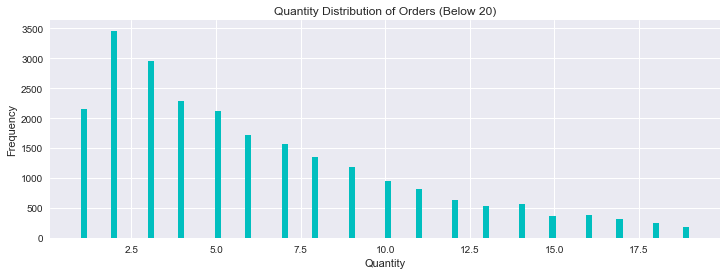

In [46]:
orderid_grouped[orderid_grouped['Quantity']<20]['Quantity'].hist(bins=100,figsize=(12,4),color='c')
plt.title('Quantity Distribution of Orders (Below 20)')
plt.ylabel('Frequency')
plt.xlabel('Quantity')

订单内的商品数量呈现出很典型的长尾分布，大部分订单的商品数量在10件内，商品数量越多，订单数相对越少

为了进一步探究订单交易金额与订单内商品件数的关系，绘制散点图：

<Figure size 1008x288 with 0 Axes>

Text(0.5, 1.0, 'Sales & Quantity')

Text(0, 0.5, 'Sales')

Text(0.5, 0, 'Quantity')

Text(0.5, 1.0, 'Sales & Quantity (Quantity < 40)')

Text(0, 0.5, 'Sales')

Text(0.5, 0, 'Quantity')

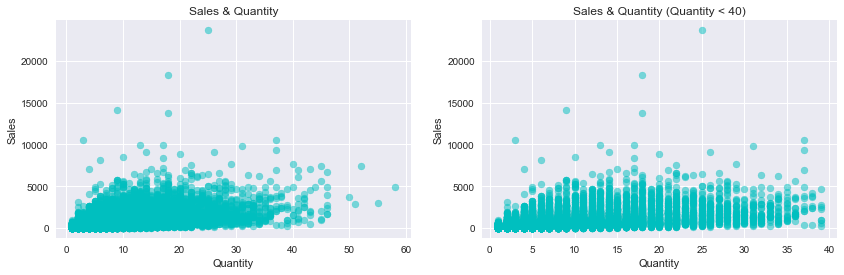

In [47]:
plt.figure(figsize=(14,4))
# plt.subplot用于绘制子图，121表示分成1*2个图片区域，占用第一个。
plt.subplot(121)
plt.scatter(orderid_grouped['Quantity'], orderid_grouped['Sales'], color = 'c',alpha=0.5)
plt.title('Sales & Quantity')
plt.ylabel('Sales')
plt.xlabel('Quantity')

# 筛去商品件数在40及以上的订单
plt.subplot(122)
plt.scatter(orderid_grouped[orderid_grouped.Quantity < 40]['Quantity'], orderid_grouped[orderid_grouped.Quantity < 40]['Sales'], color = 'c',alpha=0.5)
plt.title('Sales & Quantity (Quantity < 40)')
plt.ylabel('Sales')
plt.xlabel('Quantity')

总体来说订单交易金额与订单内商品件数是正相关的，订单内的商品数越多，订单金额也相对越高。

### 客户的生命周期

数据集的统计对象为2011年1月1日至2014年12月31日的全部订单，这里仅有四年的用户数据，也许样本中的客户有许多未进行完整的生命周期，我们并不知道在统计时段前他们是否购买过，也不知道在统计时段后他们中的哪些会继续购买。所以这里计算的生命周期是有局限性的，真实的客户平均生命周期必然会更长。

In [150]:
data_new['Order Date'].describe()

count                   51290
unique                   1430
top       2014-06-18 00:00:00
freq                      135
first     2011-01-01 00:00:00
last      2014-12-31 00:00:00
Name: Order Date, dtype: object

查看用户的初次与末次（最近）消费时间：

In [151]:
# 客户的初次消费时间
mindate = data_new.groupby('Customer ID')['Order Date'].min()
# 客户的末次消费时间
maxdate = data_new.groupby('Customer ID')['Order Date'].max()

查看用户的初次/末次消费集中在哪些日期：

In [152]:
mindate.value_counts().head(10)
maxdate.value_counts().head(10)

2011-01-11    29
2011-01-12    21
2011-02-09    20
2011-01-06    19
2011-01-03    19
2011-02-11    18
2011-01-09    18
2011-01-08    18
2011-03-03    15
2011-03-11    15
Name: Order Date, dtype: int64

2014-12-29    44
2014-12-30    43
2014-12-26    41
2014-12-25    40
2014-12-23    38
2014-12-31    35
2014-12-19    33
2014-12-11    30
2014-12-24    28
2014-12-17    27
Name: Order Date, dtype: int64

发现初次消费的高频日期为统计时段的初期，末次消费的高频日期为统计时段的末期。说明有大量用户的生命周期被低估，实际上还要向前向后延伸。

末次消费日期减去初次消费日期得到统计时段内的生命周期，展示前5行：

In [153]:
(maxdate - mindate).head()

Customer ID
AA-10315   1363 days
AA-10375   1344 days
AA-10480   1333 days
AA-10645   1423 days
AA-315     1241 days
Name: Order Date, dtype: timedelta64[ns]

0 days表示该客户只在某一天内消费过，未能留存。

再看一下客户生命周期的总体情况:

In [154]:
life_time = maxdate - mindate
life_time.describe()

count                         1590
mean     1158 days 15:55:28.301886
std       290 days 03:11:54.571555
min                0 days 00:00:00
25%             1049 days 00:00:00
50%             1262 days 12:00:00
75%             1365 days 18:00:00
max             1459 days 00:00:00
Name: Order Date, dtype: object

In [174]:
life_time

Customer ID
AA-10315   1363 days
AA-10375   1344 days
AA-10480   1333 days
AA-10645   1423 days
AA-315     1241 days
              ...   
YS-21880   1446 days
ZC-11910      0 days
ZC-21910   1192 days
ZD-11925   1265 days
ZD-21925   1408 days
Name: Order Date, Length: 1590, dtype: timedelta64[ns]

Text(0.5, 1.0, 'Life Time Distribution')

Text(0, 0.5, 'Customer number')

Text(0.5, 0, 'Life time (days)')

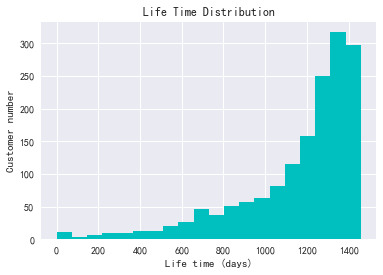

In [190]:
life_time.dt.days.hist(bins = 20, color = 'c')
plt.title('Life Time Distribution')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')
# plt.grid()

共有1590个有CustomerID的客户，其平均生命周期为1158天，中位数则是1262天，说明有部分生命周期较短的忠实客户拉低了均值；存在25%以上的客户仅消费了1000次以上，生命周期的分布呈现左尾。

直方图观察客户生命周期的实际分布。横坐标代表生命周期的天数区间，纵坐标为区间内的客户数。
许多客户仅消费过一次，较好留存下来，需要保持维护客户初次购买的体验感，延长客户生命周期，可以考虑通过网站内服务评价、客服电询等方式获知老客户对于购买流程中不满意之处，针对性地加以改进；同时应该对老客户采取吸引其二次购买的手段，如发放有时限的优惠券等。

有趣的是在700天左右出现一个小高峰，不妨将生命周期小于2年的客户排除掉再看看分布：

Text(0.5, 1.0, 'Life Time Distribution without below 700-times Deal Hunters')

Text(0, 0.5, 'Customer number')

Text(0.5, 0, 'Life time (days)')

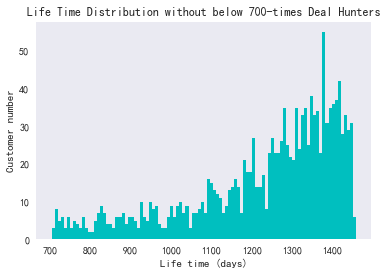

In [156]:
# 将分组增多至100，并拉宽图表的尺寸
life_time[life_time.dt.days[:] > 700].dt.days.hist(bins = 100, color = 'c')
plt.title('Life Time Distribution without below 700-times Deal Hunters')
plt.ylabel('Customer number')
plt.xlabel('Life time (days)')
plt.grid()

这个数据漂亮得有些惊人。生命周期存在周期性低值，需要针对性调查，当达到1250天后，则是数量可观的死忠客户，拥有极高的用户粘性。考虑到这些客户中有许多未进行完整的生命周期 ，实际的客户平均生命周期会更长。

In [157]:
# 消费两次及以上的用户平均生命周期
life_time[life_time.dt.days[:] > 0].mean()

Timedelta('1165 days 23:55:26.582278')

消费两次及以上的用户平均生命周期是1165天，接近于总体均值1158天。

### 客户的留存情况

客户的生命周期实际上是首次和末次消费的时间差，故无法对客户各月的消费情况获得直观的感受。因此接下来我们对客户的留存情况展开探究。这里需要说明的是，同样由于样本统计区间的缘故，我们无法判断2011年1月1日至2011年1月9日内的首次消费是否是该客户的历史首次消费。

先将用户首次消费日期合并进sales_customer中，suffixes参数是对重名的字段自定义后缀：

In [158]:
customer_retention = data_new.merge(mindate, on = 'Customer ID', how = 'inner', suffixes = ('', 'Min'))
customer_retention

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month,price,Date,Order DateMin
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,2,0.0,106.14,35.46,Medium,2011,1,204.15,1,2011-01-01
1,47809,RS-2011-4710,2011-02-14,20-02-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Kaluga,Kaluga,...,1,0.0,13.53,2.03,Low,2011,2,27.09,14,2011-01-01
2,50717,CA-2011-8490,2011-02-24,3/3/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Mississauga,Ontario,...,1,0.0,23.31,7.54,Low,2011,2,56.91,24,2011-01-01
3,46608,ML-2012-2380,2012-08-14,16-08-2012,Second Class,TB-11280,Toby Braunhardt,Consumer,Bamako,Bamako,...,1,0.0,9.03,48.77,High,2012,8,301.77,14,2011-01-01
4,50246,TU-2012-6600,2012-12-18,24-12-2012,Standard Class,TB-11280,Toby Braunhardt,Consumer,Ankara,Ankara,...,2,0.6,-73.98,5.07,Medium,2012,12,29.58,18,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,43626,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,4,0.0,13.80,4.27,Low,2014,11,12.36,2,2014-10-21
51286,43628,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,1,0.0,7.29,5.55,Low,2014,11,45.69,2,2014-10-21
51287,43625,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,2,0.0,17.70,10.76,Low,2014,11,26.04,2,2014-10-21
51288,43629,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,1,0.0,0.84,0.71,Low,2014,11,5.04,2,2014-10-21


新增字段DateDiff，用于存放本次消费日期与首次消费日期的时间差，并转为数值：

In [159]:
customer_retention['DateDiff'] = (customer_retention['Order Date'] - customer_retention['Order DateMin']).dt.days
customer_retention['DateDiff'].fillna(0,inplace=True)#填补空缺值
customer_retention

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,Year,Month,price,Date,Order DateMin,DateDiff
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,0.0,106.14,35.46,Medium,2011,1,204.15,1,2011-01-01,0
1,47809,RS-2011-4710,2011-02-14,20-02-2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Kaluga,Kaluga,...,0.0,13.53,2.03,Low,2011,2,27.09,14,2011-01-01,44
2,50717,CA-2011-8490,2011-02-24,3/3/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Mississauga,Ontario,...,0.0,23.31,7.54,Low,2011,2,56.91,24,2011-01-01,54
3,46608,ML-2012-2380,2012-08-14,16-08-2012,Second Class,TB-11280,Toby Braunhardt,Consumer,Bamako,Bamako,...,0.0,9.03,48.77,High,2012,8,301.77,14,2011-01-01,591
4,50246,TU-2012-6600,2012-12-18,24-12-2012,Standard Class,TB-11280,Toby Braunhardt,Consumer,Ankara,Ankara,...,0.6,-73.98,5.07,Medium,2012,12,29.58,18,2011-01-01,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,43626,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,0.0,13.80,4.27,Low,2014,11,12.36,2,2014-10-21,12
51286,43628,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,0.0,7.29,5.55,Low,2014,11,45.69,2,2014-10-21,12
51287,43625,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,0.0,17.70,10.76,Low,2014,11,26.04,2,2014-10-21,12
51288,43629,AG-2014-8620,2014-11-02,17-02-2014,Standard Class,DS-3180,David Smith,Corporate,Algiers,Alger,...,0.0,0.84,0.71,Low,2014,11,5.04,2,2014-10-21,12


对时间差分段，我这里将3天、7天、30天、60天、90天、180天、365天(1年)、548天、730天（2年）、912天、1095天（3年）、1278天、1460天（4年）作为区间端点，并新增字段DateDiffBin来存放：

In [160]:
date_bins = [0, 3, 7, 30, 60, 90, 180,365,548,730,912,1095,1278,1460]
customer_retention['DateDiffBin'] = pd.cut(customer_retention.DateDiff, bins = date_bins)
customer_retention['DateDiffBin'].value_counts()

(1095, 1278]    7440
(912, 1095]     7283
(730, 912]      6971
(548, 730]      6213
(365, 548]      5603
(180, 365]      5262
(1278, 1460]    4780
(90, 180]       2312
(60, 90]         767
(30, 60]         737
(7, 30]          532
(3, 7]            88
(0, 3]            61
Name: DateDiffBin, dtype: int64

DateDiffBin代表客户该笔订单的消费时间距其首次消费属于哪个时间段。因为是以OrderID为主键进行计算留存。如果客户仅消费了一次（当日多次消费也视作一次），我们认为该客户是流失了的，这里DateDiff=0，并不会被划分入(0, 3]天的开闭区间内。

接下来用pivot_table作数据透视表，这里index相当于数据透视表的行，columns相当于列，values表示聚合对象，aggfunc表示聚合方法。对Sales求和，获得的结果是客户首次消费后，在后续各时间段内的消费总金额：

In [161]:
retention_pivot = customer_retention.pivot_table(index = ['Customer ID'], columns = ['DateDiffBin'], values = ['Sales'], aggfunc= np.sum)
retention_pivot

Sales                                                    \
DateDiffBin (0, 3]    (3, 7]     (7, 30] (30, 60] (60, 90] (90, 180]   
Customer ID                                                            
AA-10315       NaN  404.7285         NaN      NaN      NaN    29.500   
AA-10375       NaN       NaN         NaN      NaN  702.090       NaN   
AA-10480       NaN       NaN         NaN   25.191   27.460  1591.110   
AA-10645       NaN       NaN   342.51000      NaN  143.085  1106.770   
AA-315         NaN       NaN         NaN      NaN      NaN       NaN   
...            ...       ...         ...      ...      ...       ...   
YS-11880       NaN       NaN    29.85000      NaN      NaN     5.472   
YS-21880       NaN       NaN         NaN      NaN      NaN       NaN   
ZC-21910       NaN       NaN  1811.77956      NaN      NaN    38.976   
ZD-11925       NaN       NaN         NaN      NaN      NaN       NaN   
ZD-21925       NaN       NaN         NaN      NaN  530.190       NaN   

                                                                       \
DateDiffBin (180, 365]  (365, 548] (548, 730]  (730, 912] (912, 1095]   
Customer ID                                                             
AA-10315      571.5200  2740.37000        NaN  4721.40000    664.1400   
AA-10375     1515.6860   190.51300   452.1960   243.48600    949.6460   
AA-10480      326.1000  2863.16928  2078.4105         NaN   2919.0300   
AA-10645      195.2700   739.78106  3407.6001  5270.18924    271.2465   
AA-315             NaN         NaN        NaN  1451.36400    767.3400   
...                ...         ...        ...         ...         ...   
YS-11880      730.4400         NaN   371.5800         NaN         NaN   
YS-21880      657.3600         NaN  6497.4120   146.30000   3637.5800   
ZC-21910     4696.6168  5160.08700  7274.3960   125.90490    846.9630   
ZD-11925           NaN   172.62600   788.9400   891.60000    715.6800   
ZD-21925      445.4600  2511.44400   676.8555  1220.12000    839.9440   

                                       
DateDiffBin (1095, 1278] (1278, 1460]  
Customer ID                            
AA-10315       3474.9455     414.2610  
AA-10375       1139.8660     674.1920  
AA-10480       7698.3280      54.5790  
AA-10645       1462.3497    2077.5291  
AA-315           20.0520          NaN  
...                  ...          ...  
YS-11880             NaN     160.3200  
YS-21880        526.4760    6755.9980  
ZC-21910       4052.0860          NaN  
ZD-11925        140.5800          NaN  
ZD-21925        590.1174    1439.8215  

[1580 rows x 13 columns]

NaN表示该客户在该区间内未进行过消费，聚合值全为NaN的客户会被过滤，即透视表中全为消费2次及以上的留存客户。

将数据转换成是否，1代表在该时间段内有后续消费，0代表没有：

In [162]:
retention_pivot_trans = retention_pivot.fillna(0).applymap(lambda x:1 if x > 0 else 0)
retention_pivot_trans.head()

Sales                                                        \
DateDiffBin (0, 3] (3, 7] (7, 30] (30, 60] (60, 90] (90, 180] (180, 365]   
Customer ID                                                                
AA-10315         0      1       0        0        0         1          1   
AA-10375         0      0       0        0        1         0          1   
AA-10480         0      0       0        1        1         1          1   
AA-10645         0      0       1        0        1         1          1   
AA-315           0      0       0        0        0         0          0   

                                                                       \
DateDiffBin (365, 548] (548, 730] (730, 912] (912, 1095] (1095, 1278]   
Customer ID                                                             
AA-10315             1          0          1           1            1   
AA-10375             1          1          1           1            1   
AA-10480             1          1          0           1            1   
AA-10645             1          1          1           1            1   
AA-315               0          0          1           1            1   

                          
DateDiffBin (1278, 1460]  
Customer ID               
AA-10315               1  
AA-10375               1  
AA-10480               1  
AA-10645               1  
AA-315                 0

统计留存客户首次消费后各时间段内的购买率，这里对各列中的1求和，再除以计数值：

In [163]:
(retention_pivot_trans.sum()/ retention_pivot_trans.count())

       DateDiffBin 
Sales  (0, 3]          0.020886
       (3, 7]          0.028481
       (7, 30]         0.150633
       (30, 60]        0.193038
       (60, 90]        0.205696
       (90, 180]       0.465190
       (180, 365]      0.693671
       (365, 548]      0.737975
       (548, 730]      0.753165
       (730, 912]      0.750633
       (912, 1095]     0.742405
       (1095, 1278]    0.671519
       (1278, 1460]    0.468354
dtype: float64

为了方便直观感受，绘制为柱形图：

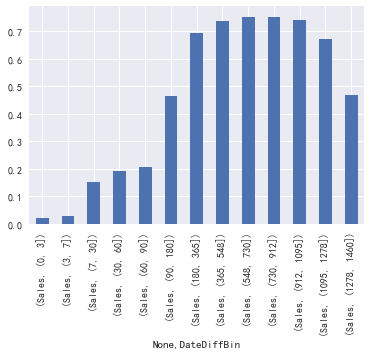

In [164]:
(retention_pivot_trans.sum()/ retention_pivot_trans.count()).plot.bar()

在这些老客户中，只有2%在第一次消费的次日至3天内有过消费，15%的客户在4-7天有过消费。

时间段|比例
--|--
客户首次消费后半年-1年内有过购买行为| 69%
客户首次消费后1年-1年半内有过购买行为| 73%
客户首次消费后1年半-2年内有过购买行为| 75%
客户首次消费后2年-2年半内有过购买行为| 75%
客户首次消费后2年半-3年内有过购买行为| 74%
客户首次消费后3年-3年半内有过购买行为| 67% 
   
说明该电商网站的客户群体，其采购并非高频行为，但留存下来的老客户忠诚度却极高。结合前文，仅有首次购买行为的客户占总客户的0.5%，然后长期购买用户比例巨大，如能提高这部分群体的留存率与年活跃率，将会带来很高的收益。

### 客户的购买周期

接下来计算客户的购买周期，思路是对其相邻两次消费日期相减，这里我们通过之前得到的DateDiff来运算。

对customer_retention去除客户编号和消费日期都相同的重复数据（即相同订单的不同商品），参数keep='first'表示保留重复值中的第一条；由于要考虑到相邻的问题，再对日期进行升序排序：

In [165]:
sales_cycle = customer_retention.drop_duplicates(subset=['Customer ID', 'Order Date'], keep='first')
sales_cycle.sort_values(by = 'Order Date',ascending = True)  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Year,Month,price,Date,Order DateMin,DateDiff,DateDiffBin
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,106.1400,35.46,Medium,2011,1,204.1500,1,2011-01-01,0,NaN
15,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,36.0360,9.72,Medium,2011,1,40.1220,1,2011-01-01,0,NaN
89,11731,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,-26.0550,4.82,High,2011,1,14.9550,1,2011-01-01,0,NaN
83,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,29.6400,8.17,High,2011,1,16.5300,1,2011-01-01,0,NaN
403,25293,IN-2011-36074,2011-01-02,5/2/2011,Second Class,DK-13150,David Kendrick,Corporate,Chongqing,Chongqing,...,137.4000,33.15,Medium,2011,1,70.4700,2,2011-01-02,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13464,7200,MX-2014-141712,2014-12-31,31-12-2014,Same Day,RB-19465,Rick Bensley,Home Office,Managua,Managua,...,1.2000,2.34,Critical,2014,12,7.5000,31,2011-02-06,1424,"(1278.0, 1460.0]"
7546,28569,ID-2014-54442,2014-12-31,4/1/2015,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Manila,National Capital,...,-37.2660,3.18,Medium,2014,12,15.4935,31,2011-01-14,1447,"(1278.0, 1460.0]"
9883,36388,CA-2014-156720,2014-12-31,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,-0.6048,0.17,Medium,2014,12,1.0080,31,2011-01-24,1437,"(1278.0, 1460.0]"
9537,31942,CA-2014-126221,2014-12-31,6/1/2015,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,...,56.5110,8.32,Medium,2014,12,104.6500,31,2011-01-24,1437,"(1278.0, 1460.0]"


定义函数diff，用于计算相邻两次消费的时间差：

In [166]:
def diff(group):
    d = group.DateDiff - group.DateDiff.shift()
    return d

shift()是往上偏移一个位置，shift(-1)是往下偏移一个位置，求客户本次消费与上次消费的时间间隔，用当前值减去shift()即可。若为NaN，则仅消费过一次。

先按客户编码分组，在应用diff函数：

In [167]:
last_diff = sales_cycle.groupby('Customer ID').apply(diff)

In [192]:
last_diff.head(20)

Customer ID       
AA-10315     26051      NaN
             26053      7.0
             26057    161.0
             26059     70.0
             26063    138.0
             26064     36.0
             26065    322.0
             26069     29.0
             26070     67.0
             26071     73.0
             26074     69.0
             26075     34.0
             26076     98.0
             26084     77.0
             26085      6.0
             26087      1.0
             26089     55.0
             26091    115.0
             26092      5.0
AA-10375     29382      NaN
Name: DateDiff, dtype: float64

第一列为客户编码，第二列是索引值，第三列表示本次消费同上次消费的时间差。

保险起见，可以提取客户编码12347的订单详情进行核对，确保我们的函数没有写错：

In [169]:
sales_cycle[customer_retention['Customer ID'] == 'AA-10315']

D:\ProgramEncode\Anaconda3\envs\tensorflow3.7\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Profit,Shipping Cost,Order Priority,Year,Month,price,Date,Order DateMin,DateDiff,DateDiffBin
26051,33526,CA-2011-128055,2011-03-31,5/4/2011,Standard Class,AA-10315,Alex Avila,Consumer,San Francisco,California,...,252.5880,54.96,Medium,2011,3,336.784,31,2011-03-31,0,NaN
26053,27386,ID-2011-40953,2011-04-07,7/7/2011,First Class,AA-10315,Alex Avila,Consumer,Marikina,National Capital,...,-8.5320,6.66,High,2011,4,29.238,7,2011-03-31,7,"(3.0, 7.0]"
26057,38766,CA-2011-138100,2011-09-15,20-09-2011,Standard Class,AA-10315,Alex Avila,Consumer,New York City,New York,...,6.2608,1.31,Medium,2011,9,7.280,15,2011-03-31,168,"(90.0, 180.0]"
26059,8001,MX-2011-114685,2011-11-24,26-11-2011,Second Class,AA-10315,Alex Avila,Consumer,Mexico City,Distrito Federal,...,56.9000,5.21,High,2011,11,34.520,24,2011-03-31,238,"(180.0, 365.0]"
26063,32596,CA-2012-121391,2012-04-10,7/10/2012,First Class,AA-10315,Alex Avila,Consumer,San Francisco,California,...,7.0096,5.23,Critical,2012,4,13.480,10,2011-03-31,376,"(365.0, 548.0]"
26064,16421,ES-2012-2960821,2012-05-16,21-05-2012,Standard Class,AA-10315,Alex Avila,Consumer,Parla,Madrid,...,27.0900,167.35,Medium,2012,5,387.630,16,2011-03-31,412,"(365.0, 548.0]"
26065,36498,CA-2013-103982,2013-04-03,9/3/2013,Standard Class,AA-10315,Alex Avila,Consumer,Round Rock,Texas,...,5.7365,3.52,Medium,2013,4,5.960,3,2011-03-31,734,"(730.0, 912.0]"
26069,4754,MX-2013-140354,2013-05-02,11/2/2013,Standard Class,AA-10315,Alex Avila,Consumer,Culiacán,Sinaloa,...,12.2000,3.26,Medium,2013,5,12.260,2,2011-03-31,763,"(730.0, 912.0]"
26070,16762,ES-2013-5491146,2013-07-08,12/8/2013,Standard Class,AA-10315,Alex Avila,Consumer,Berlin,Berlin,...,22.6680,5.35,Medium,2013,7,17.037,8,2011-03-31,830,"(730.0, 912.0]"
26071,19020,ES-2013-4677050,2013-09-19,21-09-2013,Second Class,AA-10315,Alex Avila,Consumer,Nottingham,England,...,52.6200,51.79,Critical,2013,9,79.740,19,2011-03-31,903,"(730.0, 912.0]"


与last_diff的日期间隔一致，函数使用正确。

画出按订单统计的购买周期柱状图，查看其分布：

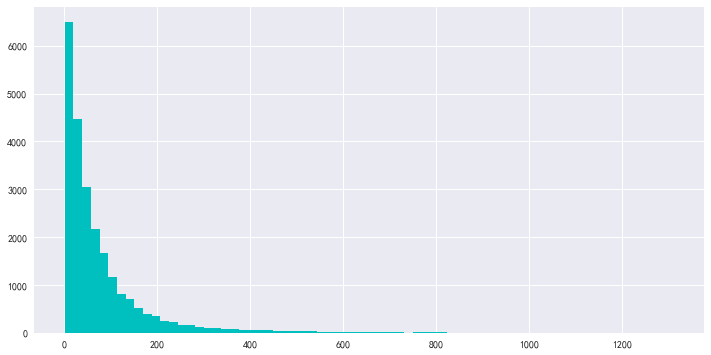

In [170]:
last_diff.hist(bins = 70, figsize = (12, 6), color = 'c')

典型的长尾分布，大部分购买行为的消费间隔比较短。但这是所有订单的购买周期分布，并不是对客户个体为统计单位的购买周期分布。故对客户编号进行分组：

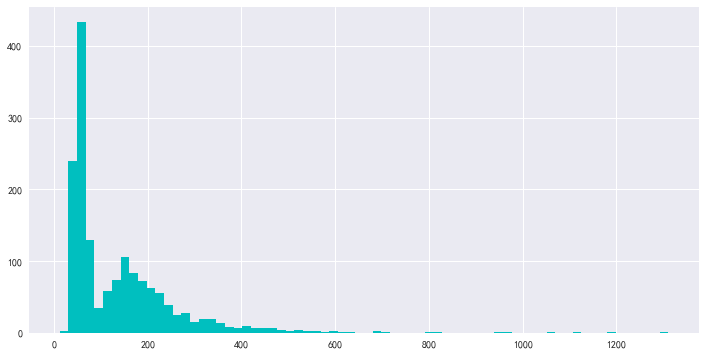

In [171]:
last_diff_customer = last_diff.groupby('Customer ID').mean()
last_diff_customer.hist(bins = 70, figsize = (12, 6), color = 'c')

一个右偏分布，峰值在15-70天，说明大部分留存客户的购买周期集中于此。建议可以每隔30天左右对客户进行些优惠活动的信息推送，比较符合大部分老客户的购买周期。

## 客户价值分析

### 客户维度分析

In [48]:
data_new.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year', 'Month', 'price',
       'Date'],
      dtype='object')

In [49]:
customer_grouped = data_new.groupby(['Customer ID','Order Date'])[['Sales','Quantity']].sum().reset_index()       
customer_grouped = customer_grouped.groupby('Customer ID').agg({'Order Date': np.size, 'Quantity': np.sum, 'Sales': np.sum})
customer_grouped.describe()

,Order Date,Quantity,Sales
count,1590.000000,1590.000000,1590.000000
mean,15.908176,112.145912,7951.259063
std,10.347961,90.881731,6936.570172
min,1.000000,1.000000,7.173000
25%,6.000000,27.000000,1674.812250
50%,14.000000,77.000000,6248.135590
75%,25.000000,195.000000,13133.098420
max,40.000000,398.000000,35668.120800


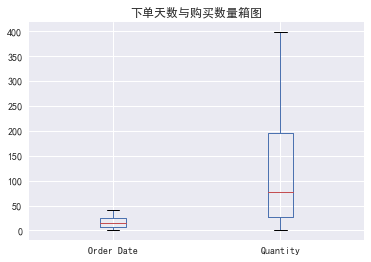

In [216]:
customer_grouped[['Order Date','Quantity'	]].plot.box(title="下单天数与购买数量箱图")   

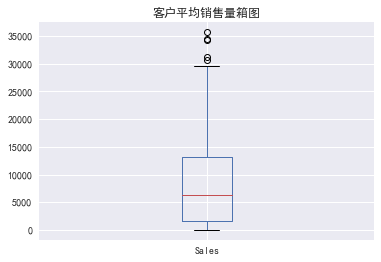

In [218]:
customer_grouped['Sales'].plot.box(title="客户平均销售量箱图")   

人均购买笔数为16笔，中位数为14笔，仅少部分客户4年下过一单，客户留存较好。4年每位客户平均购买了112件商品，超过中分位数45%，最多的客户购买了398件，结合之前单笔销量多数在10件左右，说明客户频繁购买，活跃度较好；客单价为7951美元，平均值同样超过了中位数，说明客户的购买力存在一定差距，存在小部分的高消费用户拉高了人均数值。

In [50]:
35/77

0.45454545454545453

进一步观察客户消费金额的分布：

Text(0.5, 1.0, 'Sales Distribution of Customers')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Sales')

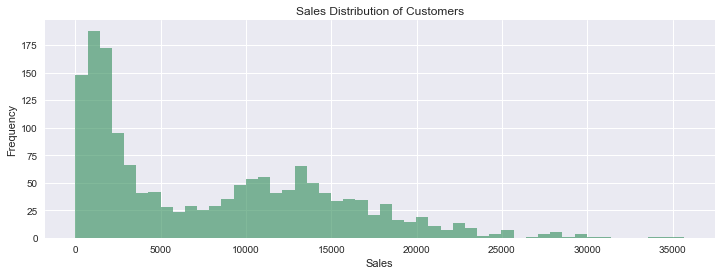

In [51]:
customer_grouped.Sales.hist(bins = 50, figsize = (12, 4), fc = 'seagreen',alpha=0.6)
plt.title('Sales Distribution of Customers')
plt.ylabel('Frequency')
plt.xlabel('Sales')

从直方图看，四年里，客户总消费金额集中在20000美元内，两个峰值分别为2000美元内、12000-13000美元。不知道是否存在某种共性，之后可以进行进一步探究。其次大部分用户的消费能力确实不高，高消费用户较少。这也确实符合消费行为的行业规律。

截取消费额16000美元以内的客户：

Text(0.5, 1.0, 'Sales Distribution of Customers (Below 16000)')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Sales')

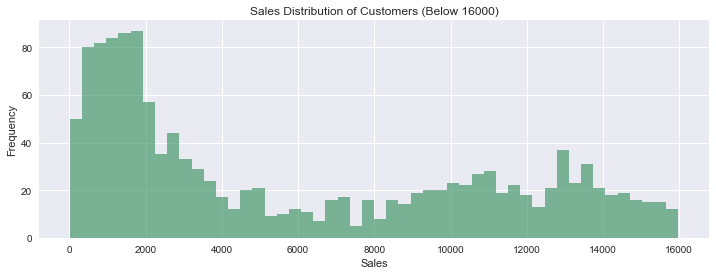

In [52]:
customer_grouped[customer_grouped.Sales<16000].Sales.hist(bins = 50, figsize = (12, 4), fc = 'seagreen',alpha=0.6)
plt.title('Sales Distribution of Customers (Below 16000)')
plt.ylabel('Frequency')
plt.xlabel('Sales')

与前面订单金额的分布呈现单峰长尾形态相比，客户消费金额集中在500-2000美元间，12000-13000美元。不知道是否存在某种共性，之后可以进行进一步探究。

绘制客户消费金额与消费件数的散点图：

<Figure size 1008x288 with 0 Axes>

Text(0.5, 1.0, 'Sales & Quantity')

Text(0, 0.5, 'Sales')

Text(0.5, 0, 'Quantity')

Text(0.5, 1.0, 'Sales & Quantity (Quantity<195)')

Text(0, 0.5, 'Sales')

Text(0.5, 0, 'Quantity')

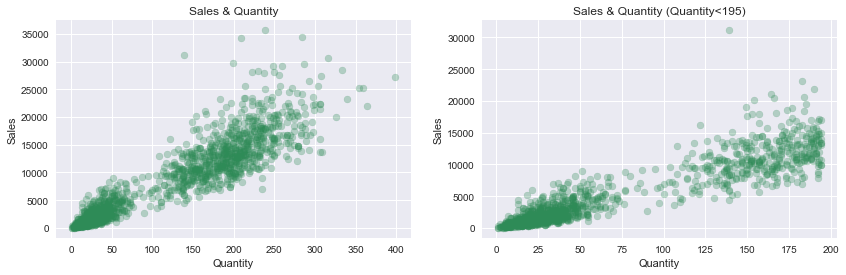

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(customer_grouped['Quantity'], customer_grouped['Sales'], fc = 'seagreen',alpha=0.3)
plt.title('Sales & Quantity')
plt.ylabel('Sales')
plt.xlabel('Quantity')

plt.subplot(122)
plt.scatter(customer_grouped[customer_grouped.Quantity < 195]['Quantity'], customer_grouped[customer_grouped.Quantity < 195]['Sales'], fc = 'seagreen',alpha=0.3)
plt.title('Sales & Quantity (Quantity<195)')
plt.ylabel('Sales')
plt.xlabel('Quantity')

客户群体比较健康，而且规律性比订单更强，同时拥有一定数量消费能力强的用户。总体来说客户的消费金额与购买的商品数量是正相关的，客户购买的东西越多，消费金额相对就越高。

### 客户分类占比及同比变化

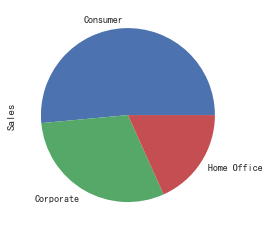

In [219]:
#不同类型客户销售额占比
data_new.groupby('Segment').sum()['Sales'].plot(kind='pie')

In [60]:
#df是年份和客户种类关于销量的
df2 = data_new.pivot_table(values='Sales',
    index='Segment',
    columns='Year',
    aggfunc='sum').stack().reset_index().rename(columns={0:'Sales'})
df2

,Segment,Year,Sales
0,Consumer,2011,1.173671e+06
1,Consumer,2012,1.463760e+06
2,Consumer,2013,1.729255e+06
3,Consumer,2014,2.141263e+06
4,Corporate,2011,6.916626e+05
5,Corporate,2012,7.744596e+05
6,Corporate,2013,1.064973e+06
7,Corporate,2014,1.293602e+06
8,Home Office,2011,3.941170e+05
9,Home Office,2012,4.392188e+05


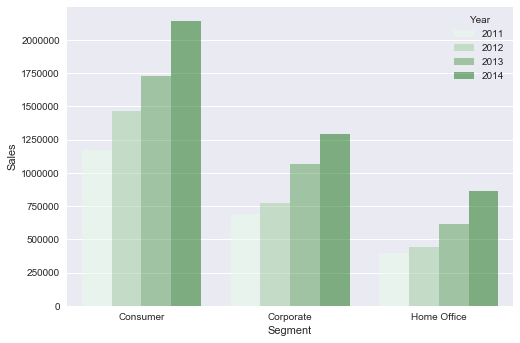

In [61]:
sns.barplot(data=df2,x='Segment',y='Sales',hue="Year",color="g",alpha=0.5)

分析：从以上两个图表看出，超过一半以上的客户为普通消费者consumer，且每类客户每年均在保持增长趋势，客户结构还是非常不错的。其中corporate和home office维系的好一般属于稳定长期客户，还可以有增长空间（后续会单独对corporate和home office新老客户占比进行分析验证）

### 新客户数、老客户数及新客户占比

新老客户分布，可以对超市客户维系健康状态进行了解
> 计算方式1：只要在超市里消费过即算做是老客户，没有时间限制

In [62]:
#每年新增用户数
df3_new_cus_row=data_new.groupby(["Year","Month","Customer ID"]).count()['Order ID'].reset_index([-2,-1])
def trans(x):
    temp4 = x.drop_duplicates('Customer ID').pivot_table(values='Customer ID',
    index='Month',
    columns='Year',
    aggfunc='count')
    return temp4
t1=trans(df3_new_cus_row.loc[2012])
t2=trans(df3_new_cus_row.loc[2013])
t3=trans(df3_new_cus_row.loc[2014])
df3_new_cus1=pd.concat([t1,t2,t3],axis=1)

In [63]:
#每年新增用户数
# df3_new_cus=data_new.drop_duplicates('Customer ID').pivot_table(values='Customer ID',
#     index='Month',
#     columns='Year',
#     aggfunc='count')[[2012,2013,2014]]
# df3_new_cus = df3_new_cus.fillna(0)
# df3_new_cus=df3_new_cus.astype("int32")

In [64]:
#总共用户数
df3_total_cus=data_new.groupby(["Year","Month","Customer ID"]).count()['Order ID'].reset_index().pivot_table(values='Customer ID',       
    index='Month',
    columns='Year',
    aggfunc='count',)[[2012,2013,2014]]  

In [65]:
#比率
df3_rate=np.around(df3_new_cus1/df3_total_cus,5)

In [66]:
#汇总的大表
df3_final = pd.concat([df3_new_cus1,df3_total_cus,df3_rate],keys=['New customer','Total customer','Rate'],axis=1)                   

In [67]:
df3_final.style.background_gradient(cmap='BuGn',axis =0,low=0,high=1)

分析：总表中可以发现从12年到14年，每年的新客户数量均在减少，因为11年的数据没有前一年参照，所以剔除。其中新客户数量逐年降低也和我们新老客户的计算方式有关。

In [68]:
#换一种方式计算
mindata=data_new.groupby('Customer ID')["Order Date"].min()

In [69]:
df4 = data_new.merge(mindata,on='Customer ID',how = 'inner', suffixes = ('', 'Min'))

In [70]:
df4['DateDiff']=(df4['Order Date']-df4['Order DateMin']).dt.days

In [221]:
df4_temp = df4[df4['DateDiff']>=365].groupby(['Year','Month','Customer ID']).count()['Row ID'].reset_index()    
df4_temp.pivot_table(values='Customer ID',       
    index='Month',
    columns='Year',
    aggfunc='count',
    margins=True,
    margins_name='All')[[2012,2013,2014]].style.background_gradient(cmap='BuGn',axis =1,low=0,high=1)  

Year,2012,2013,2014
Month,,,
1,37,310,436
2,85,324,410
3,159,349,487
4,164,348,463
5,221,424,510
6,313,489,610
7,250,377,439
8,315,501,587
9,370,539,617


分析：按照方式2计算的新客户数量明显比方式1计算的数量高出不少（11年的数据没有参考性，就不放了）。但是这里计算周期是年，所以总体来说上半年新客户数量会比下半年数量要高，但是下半年新客户占比又会比上半年高，所以同一年内对不同月份进行新客户数量对比没有太大意义。

但可以进行同比对比分析，总体来说新客户数量是在逐年递减的，说明该企业老客户的维系不错，但新客获取率较低。如果能够在新客户获取上能够突破，会给企业带来很大的增长空间。

### RFM指标计算

RFM模型是研究价值用户的经典方法之一，本次数据集数据信息完整，可以有效地利用RFM模型来找出价值用户。

第一步先计算出RFM模型的每一个指标，第二步则采用K-means clustering alrogithm算法将用户进行分组从而找出最具有价值的用户群。

> R - Recency

Recency在这里定义为用户最后一次购物距离现在有多久

In [72]:
#计算首末次消费时间
First_purchase= data_new.groupby('Customer ID')['Order Date'].min()
Last_purchase = data_new.groupby('Customer ID')['Order Date'].max()

先计算出最后一次购买时间距离最后一天的天数，然后再计算月分数

In [73]:
#Recency in days
Max_date=data_new["Order Date"].max()+datetime.timedelta(days=1)
Recency_days=Last_purchase.map(lambda x:(Max_date-x).days)

In [74]:
#Recency in months
Recency_months=Recency_days.map(lambda x:round(x/30,1))
Recency_months.head()

Customer ID
AA-10315    0.3
AA-10375    0.2
AA-10480    3.9
AA-10645    0.9
AA-315      0.1
Name: Order Date, dtype: float64

In [75]:
Recency_months.describe()

count    1590.000000
mean        2.955535
std         4.262816
min         0.000000
25%         0.500000
50%         1.400000
75%         3.500000
max        37.300000
Name: Order Date, dtype: float64

按区间进行观察

In [76]:
#Bin information
bins1=[0,1,2,3,4,5,6,7,8,9,10,11,12,16,20,24,28,32,36,40,44]
pd.cut(Recency_months,bins1).value_counts()

(0, 1]      625
(1, 2]      319
(2, 3]      147
(3, 4]      131
(4, 5]       66
(6, 7]       51
(12, 16]     44
(5, 6]       41
(7, 8]       27
(8, 9]       22
(16, 20]     18
(10, 11]     16
(9, 10]      15
(11, 12]     14
(20, 24]     11
(24, 28]      4
(28, 32]      2
(36, 40]      1
(32, 36]      1
(40, 44]      0
Name: Order Date, dtype: int64

大概有39.3%的客户在一个月之内有购物行为，画图。

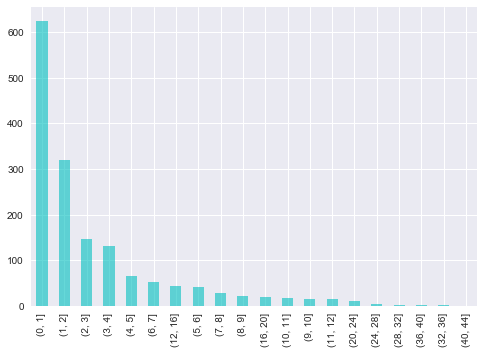

In [77]:
pd.cut(Recency_months,bins1).value_counts().plot.bar(color='c',alpha=0.6)

分布总体来说比较理想，可以利用customer-centric以客户为中心的商业理念来提高[1,2]以及[2，3]也即1～2个月，2～3个月之内有购物行为的用户。

> F- Frequency

Frequency在这里定义为购物频率，这里分析2014年一年里面，用户总购买次数。

In [78]:
#Frequency - How often do they purchase? in 2014 Year
Unique_purchase=data_new[data_new['Year']==2014].drop_duplicates(subset=['Order ID'])
Freq_purchase=Unique_purchase.groupby(['Customer ID'])['Order ID'].count()
Freq_purchase.head()

Customer ID
AA-10315     7
AA-10375     7
AA-10480     6
AA-10645    10
AA-315       2
Name: Order ID, dtype: int64

In [79]:
#Description information
Freq_purchase.describe() #有一条订单有两件商品

count    1499.000000
mean        5.691127
std         3.774342
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        21.000000
Name: Order ID, dtype: float64

购买的频率差异很大，最小为1次，最大为21次，切片看数据分布情况。

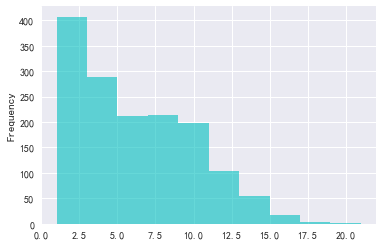

In [223]:
Freq_purchase.plot.hist(color='c',alpha=0.6)

In [81]:
#Bin information
bins2=[1,3,5,7,9,11,13,15,17,19,21]
pd.cut(Freq_purchase,bins2).value_counts()

(1, 3]      381
(5, 7]      219
(3, 5]      218
(7, 9]      217
(9, 11]     153
(11, 13]     81
(13, 15]     29
(15, 17]      7
(17, 19]      2
(19, 21]      1
Name: Order ID, dtype: int64

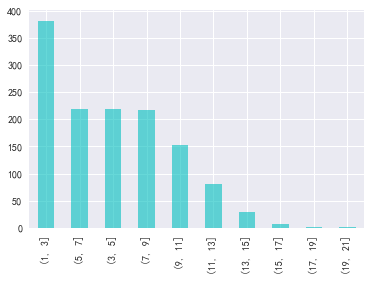

In [224]:
pd.cut(Freq_purchase,bins2).value_counts().plot.bar(color='c',alpha=0.6)

大部分用户在一年的时间里购买次数在1～3次以内，结合之前的分析，这是一个大型家具办公零售商。大部分客户在1-11次。这里要注意有些离散的数值，比如一年里面消费19～21次的用户有1位用户，17-19次的用户有2位，后续的分析会针对这些离散值做特殊处理。

> M - Monetary

Monetary定义为用户在一年之内所花总金额。

In [83]:
#Monetary - How much do they spend?
Money_purchase=data_new.groupby(['Customer ID']).Sales.sum()
Money_purchase.head()

Customer ID
AA-10315    13747.41300
AA-10375     5884.19500
AA-10480    17695.58978
AA-10645    15343.89070
AA-315       2243.25600
Name: Sales, dtype: float64

In [84]:
#Description information
Money_purchase.describe()

count     1590.000000
mean      7951.259063
std       6936.570172
min          7.173000
25%       1674.812250
50%       6248.135590
75%      13133.098420
max      35668.120800
Name: Sales, dtype: float64

每个用户的消费总金额差异很大，最小值位7.2美元，最大值位35668美元。

看数据分布：

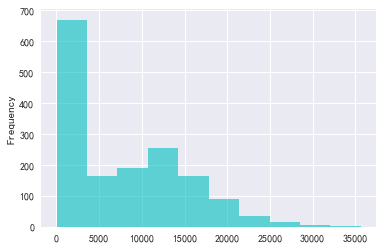

In [225]:
Money_purchase.plot.hist(color='c',alpha=0.6)

跟购物频率F一样，购买金额也存在一些离散值，后续分析中会特别处理。

综合上面的计算，RFM的三个指标的数据区间范围分别是：

/|/
--|--
R|[0,37.2]
F|[1,21]
M|[7.2,35668.1]

### 建立模型

#### 利用RFM模型挖掘价值用户

第一步，建立RFM矩阵，并且给列名重命名。

In [86]:
#Calculate RFM metrics
rfm=data_new.groupby(['Customer ID']).agg({'Order Date':lambda x:(Max_date-x.max()).days,
                                                'Order ID':'count',
                                                'Sales':'sum'})
#Rename columns
rfm.rename(columns={'Order Date':'Recency','Order ID':'Frequency','Sales':'Monetary'},inplace=True)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,9,42,13747.41300
AA-10375,7,42,5884.19500
AA-10480,118,38,17695.58978
AA-10645,27,73,15343.89070
AA-315,3,8,2243.25600


第二步，建立用户行为评分机制，评分从1-4，对于recency标签，数值越大评分越小，因为商家喜欢近期活跃的用户，对于frequency购买频率以及monetary消费总额是越大评分越高。

In [87]:
#Building RFM rating principle
r_labels=range(4,0,-1)
f_labels=range(1,5,1)
m_labels=range(1,5,1)

根据RFM用户三个标签对用户行为进行划分，使用了pd.qcut函数对每个标签下的数据进行4等分，并且赋予评分。

In [88]:
r_quartiles = pd.qcut(rfm['Recency'],q=4,labels=r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4,labels=f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels=m_labels)

rfm = rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)

In [89]:
rfm

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
AA-10315,9,42,13747.41300,4,3,4
AA-10375,7,42,5884.19500,4,3,2
AA-10480,118,38,17695.58978,1,3,4
AA-10645,27,73,15343.89070,3,4,4
AA-315,3,8,2243.25600,4,1,2
...,...,...,...,...,...,...
YS-21880,10,54,18703.60600,4,4,4
ZC-11910,201,1,7.17300,1,1,1
ZC-21910,4,84,28472.81926,4,4,4


有了RFM每个标签的评分后进行统计和算出每一位用户的最终得分，这里是把每个标签的评分相加。

In [90]:
#Calculate RFM Segment and RFM Score
def add_rfm(x):
    return str(x['R'])+str(x['F'])+str(x['M'])

rfm['RFM_Segment']=rfm.apply(add_rfm,axis=1)
rfm['RFM_Score']=rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
AA-10315,9,42,13747.41300,4,3,4,434,11.0
AA-10375,7,42,5884.19500,4,3,2,432,9.0
AA-10480,118,38,17695.58978,1,3,4,134,8.0
AA-10645,27,73,15343.89070,3,4,4,344,11.0
AA-315,3,8,2243.25600,4,1,2,412,7.0


再来看看RFM综合评分的统计信息，综合评分最低为3分，最高为12分。

In [91]:
#Summary metrics over RFM Score
rfm.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         292.2       7.1    818.2   186
4.0         177.1      10.2   1624.1   153
5.0         136.6      14.2   2402.2   166
6.0          57.9      15.6   2748.3   144
7.0          41.2      20.2   3860.6   112
8.0          44.6      33.0   7373.8   139
9.0          40.9      44.9  11341.8   170
10.0         29.1      50.6  13781.7   236
11.0         18.0      58.7  15649.2   170
12.0          6.7      64.8  18851.0   114

用户根据RFM的综合评分RFM_Score分为了10个等级，实际运用中可能需要比较粗略的划分，这里把用户分为3个大的等级。

In [92]:
#Use RFM score to group customers into Gold, Silver, Bronze segments:
def segments(df):
    if df['RFM_Score']>9:
        return 'Gold'
    elif (df['RFM_Score']>5) and (df['RFM_Score']<=9):
        return 'Silver'
    else:
        return 'Bronze'
    
rfm['General_Segment']=rfm.apply(segments,axis=1)
rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            206.2      10.4   1583.0   505
Gold               20.6      56.4  15503.6   520
Silver             46.2      29.6   6692.4   565

分别是金、银、铜三个等级，RFM综合评分分别为：10-12、6-9、3-5。

这样可以把所有的用户根据上述RFM模型进行划分，价值用户就可以挖掘出来，可以根据粗略的划分General_Segment或者根据RFM_Score确定价值用户。

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
Customer ID,,,,,,,,,
AA-10315,9,42,13747.41300,4,3,4,434,11.0,Gold
AA-10375,7,42,5884.19500,4,3,2,432,9.0,Silver
AA-10480,118,38,17695.58978,1,3,4,134,8.0,Silver
AA-10645,27,73,15343.89070,3,4,4,344,11.0,Gold
AA-315,3,8,2243.25600,4,1,2,412,7.0,Silver


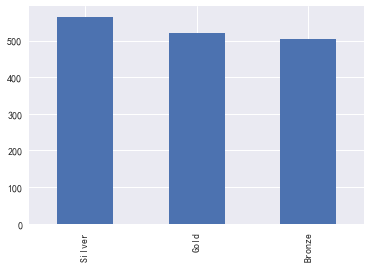

In [229]:
rfm.head()
rfm['General_Segment'].value_counts().plot(kind='bar')

（二）使用机器学习算法K-Means挖掘价值用户

在机器学习中大概可以划分为三种学习类型：（1）supervised learning; (2) unsupervised learning; (3) semi-supervised learning。在Unsupervised learning中模型不需要算出某个预测值，最经典的应用就是clustering聚类，也就是对数据集进行分组。

聚类是将一组对象组合在一起的任务，使得同一聚类中的对象彼此更相似，而不是与其他聚类中的对象相似。相似度是反映两个数据对象之间关系强度的度量。聚类主要用于探索性数据挖掘。它在许多领域具有多种用途，例如机器学习，模式识别，图像分析，信息检索，生物信息学，数据压缩和计算机图形学等等。

在聚类计算中，K-Means是个非常流行的算法，在本次分析中就采用了这个方法来进行价值用户的挖掘。

K-Means算法的应用有三个限制：（1）标签的分布是对称的，not skewed；（2）标签的平均值一样；（3）标签的方差一样。

针对对称问题，可以用对数变换（Logarithmic transformation）来解决，针对平均值和方差一样的问题，可以标准化转换(standardization)来解决，这两步的顺序是有严格要求的，因为log变换只适用于大于零的数值，而标准化会产生负值，所以必须要先进行log转换后进行standardization。

在前面的描述统计分析中，我们已经清楚地知道R\F\M三个标签的直方图是严重不对称，而且平均值以及方差都不一样，所以需要进行下面的两步转换。

第一步，对数变换（Logarithmic transformation）

In [195]:
rfm_k=rfm[['Recency','Frequency','Monetary']]
#unskew the data with log transformation
rfm_log=rfm[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)

把三个标签的直方图画在一起。

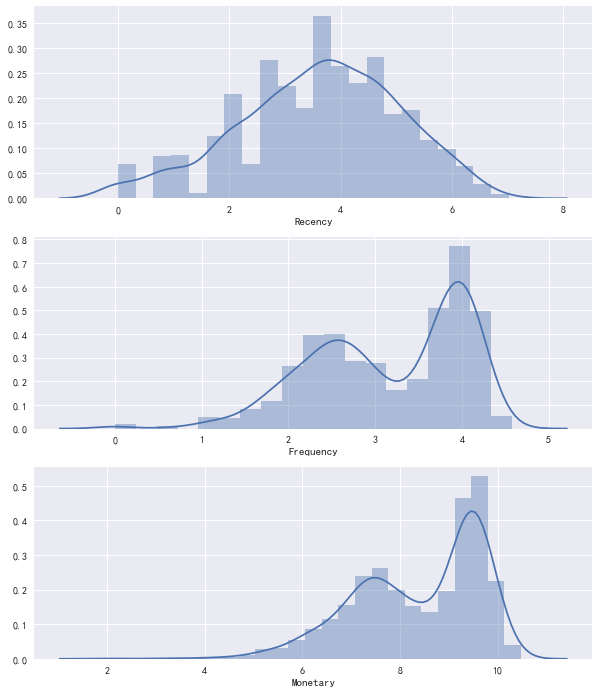

In [196]:
#plot the distribution of RFM values
f,ax=plt.subplots(figsize=(10,12))
plt.subplot(3,1,1);sns.distplot(rfm_log.Recency,label='Recency')
plt.subplot(3,1,2);sns.distplot(rfm_log.Frequency,label='Frequency')
plt.subplot(3,1,3);sns.distplot(rfm_log.Monetary,label='Monetary')
plt.show()

第二步，标准化（Standardization）

对数变换之后是标准化，使用公式：

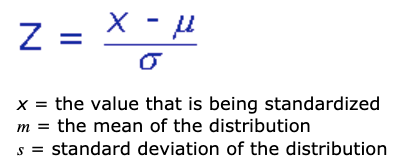

使用scikit-learn里面preprocessing下面的StandardScaler实现标准化转换。

In [197]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized=scaler.transform(rfm_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

第三步，选择适合的聚类数目

选择聚类数目的方法有好几种，这里采用的是Elbow Criterion method。

In [198]:
# 导包
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#1st step: get the best KMeans
score=[]
inertias=[]

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=666)
    kmeans.fit(rfm_normalized)
    score.append(silhouette_score(rfm_normalized,kmeans.labels_))
    inertias.append(kmeans.inertia_)#sum of squared distances of samples to their closest cluster center

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

Text(0.5, 0, 'Number of clusters,k')

Text(0, 0.5, 'silhouette_score')

Text(0.5, 1.0, 'What is the best number for KMeans?')

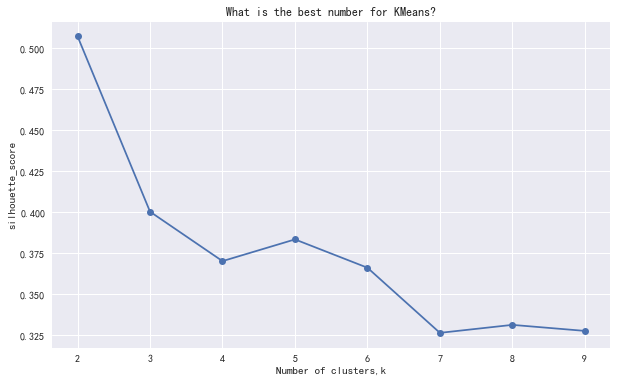

In [199]:
#plot silhouette_score
f,ax = plt.subplots(figsize=(10,6))
plt.plot(range(2,10),score,'-o')
plt.xlabel('Number of clusters,k')
plt.ylabel('silhouette_score')
plt.title('What is the best number for KMeans?')
plt.show()

Text(0.5, 0, 'Number of clusters,k')

Text(0, 0.5, 'inertias')

Text(0.5, 1.0, 'What is the best number for KMeans?')

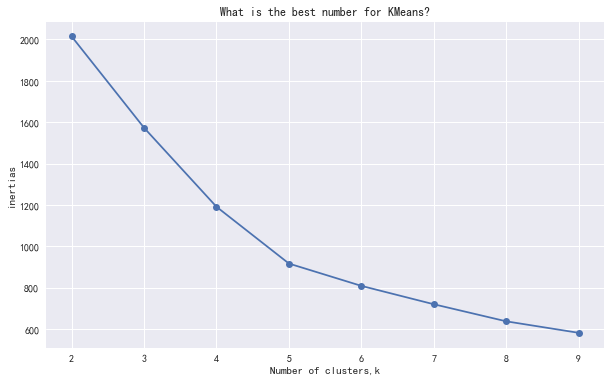

In [230]:
#plot silhouette_score
f,ax = plt.subplots(figsize=(10,6))
plt.plot(range(2,10),inertias,'-o')
plt.xlabel('Number of clusters,k')
plt.ylabel('inertias')
plt.title('What is the best number for KMeans?')
plt.show()

这里要说一下K-Means聚类方法的原理，简单说就是找到聚类的中心点，可以是已有的数值点也可以是数据集中没有实际存在的数值点，比如3个聚类就有3个聚类中心点，围绕这3个中心点计算数据集中每一个点到这3个中心点的距离，将数据点归类到最短距离的中心点类别中
- 1.先确定超参数k(k就是我们想要将数据聚集成⼏类),假设k取3
- 2.在所有数据当中,随机选择三个点,作为聚类的初始中⼼点.
- 3.对每⼀个其他的数据点依次计算到这三个中⼼点的距离,将数据划分到离它最近的点所代
表的的簇.这样将所数据划分成三个类别.
- 4.分别计算三个簇的质⼼,作为新的中⼼点.
- 5.以这三个中⼼点作为新的聚类中⼼,重复上⾯的第三步-第四步.
- 6.停⽌条件:1.当某次迭代之后,所有点所在的簇没有发⽣任何变化.2.达到你设定的迭代次
数上限.

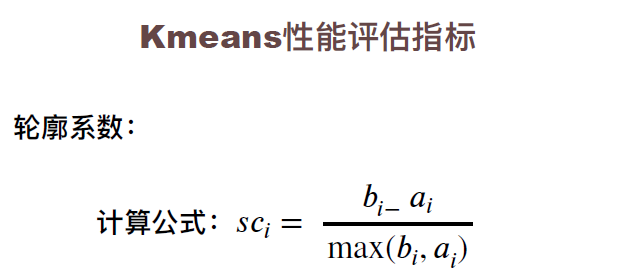

上图计算的Inertia就是距离平方和[(x2-x1)^2+(y2-y1)^2+(z2-z1)^2]，聚类中心点越多，也就是分类越多，数据点距离这些中心点的距离平方和就越大，所以上图中clusterk越大，inertia就越小，综合考虑，这里选择cluster_k=3进行分组聚类计算。

第四步，模型计算

In [201]:
# clustering
kmeans=KMeans(n_clusters=3,random_state=666)
kmeans.fit(rfm_normalized)

# Create a cluster label column in the original DataFrame
cluster_labels = kmeans.labels_

# Calculate average RFM values and size for each cluster
rfm_k3=rfm_k.assign(k_cluster=cluster_labels)

#Calculate average RFM values and sizes for each cluster
rfm_k3.groupby('k_cluster').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=666, tol=0.0001, verbose=0)

Recency Frequency Monetary      
             mean      mean     mean count
k_cluster                                 
0            32.0      52.0  13824.0   795
1            67.0      16.0   2780.0   456
2           251.0       8.0   1135.0   339

通过对比RFM模型得出的Gold\Silver\Bronze，这里得出的三个聚类0，1，2分别对应了Silver\Bronze\Gold，最具有价值的用户群是k_cluster = 0这个类别的用户。

利用K-Means算法把用户进行分类，从而挖掘出价值用户，看看分析的最终结果。

,Recency,Frequency,Monetary,k_cluster
Customer ID,,,,
AA-10315,9,42,13747.41300,0
AA-10375,7,42,5884.19500,0
AA-10480,118,38,17695.58978,0
AA-10645,27,73,15343.89070,0
AA-315,3,8,2243.25600,1


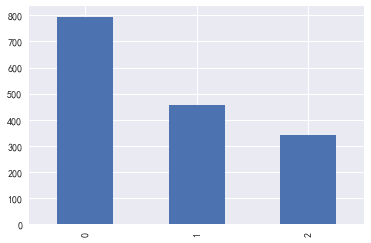

In [231]:
rfm_k3.head()
rfm_k3[	'k_cluster'].value_counts().plot(kind='bar')

找到k_cluster=0的价值用户，对价值用户的购物行为进行针对性分析，比如消费习惯（购物时段）、喜欢购买的商品种类、购物种类的关联性（喜欢一起购买的产品）等等，这样就可以给价值用户提供个性化的消费方案，针对价值用户提供以消费者为中心的智能商业模式。

这里使用了机器学习中的unsupervised类型的学习方法，没有评估模型的特定指标，想要验证上述采用 RFM模型以及K-Means算法进行价值用户挖掘的有效性和准确性，需要在实际应用中验证分类效果。

#### 价值用户挖掘结果

（1）用户画像

用户已经进行分组，接下来看看不同类型用户的消费行为特征。

In [203]:
# cov = coefficient of variance
def cov(x):
    return np.std(x)/np.mean(x)

rfm.groupby('General_Segment').agg({'Recency':['mean','std',cov],'Frequency':['mean','std',cov],'Monetary':['mean','std',cov]}).round(1)

Recency             Frequency            Monetary             
                   mean    std  cov      mean   std  cov     mean     std  cov
General_Segment                                                               
Bronze            206.2  169.5  0.8      10.4   5.0  0.5   1583.0  1297.4  0.8
Gold               20.6   20.4  1.0      56.4  11.4  0.2  15503.6  4810.8  0.3
Silver             46.2   39.7  0.9      29.6  15.4  0.5   6692.4  4719.3  0.7

通过建立RFM模型及评分方法分组得出的结果显示，价值用户最近一次消费的平均值是20.6天，平均频率是56.4次，平均花费是15503美元。

In [204]:
# cov = coefficient of variance
def cov(x):
    return np.std(x)/np.mean(x)

rfm_k3_sta=rfm_k3.groupby('k_cluster').agg({'Recency':['mean','std',cov],'Frequency':['mean','std',cov],'Monetary':['mean','std',cov]}).round(1)
rfm_k3_sta  

Recency             Frequency            Monetary             
             mean    std  cov      mean   std  cov     mean     std  cov
k_cluster                                                               
0            31.7   31.8  1.0      51.9  12.3  0.2  13823.8  4962.7  0.4
1            66.7   67.6  1.0      15.7   5.6  0.4   2780.2  1668.3  0.6
2           251.4  183.1  0.7       8.4   3.8  0.4   1135.2   903.4  0.8

上面结果是使用K-Means方法得出的结果，价值用户最近一次消费的平均值是31.7天，平均频率是51.9次，平均花费是	13823.8英镑，结果与使用评分方法各有好坏。综合比较，这里选择RFM分类结果。

（2）价值用户对销售额的贡献

(-1.1151966920026741,
 1.1108126107373013,
 -1.1140121089684685,
 1.1006672432842128)

Text(0.5, 1.0, 'Customer Segment in %')

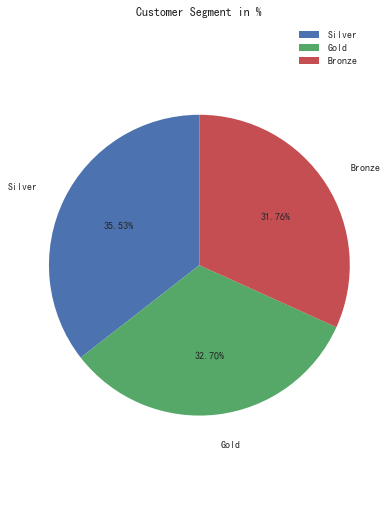

In [234]:
# different customer category and the number of customer using K-means
customer_num=rfm_k3.groupby('k_cluster').agg({'Recency':['count']})
# pie figure
fig=plt.figure(figsize=(6,9))
test=rfm['General_Segment'].value_counts()
# labels = [u'cluster0',u'cluster1',u'cluster2']
labels = rfm['General_Segment'].value_counts().index
# colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
#                       colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment in %')
plt.show()
fig.savefig('segmentINpercent.png')

上图是用户分组的情况，按照价值贡献情况排名分别是cluster0, cluster1, cluster2，价值用户cluster0占比42.06%。下面看看不同用户分组对销售额的贡献情况。

In [206]:
# different customer category and associated sales using K-means
customer_sales=rfm_k3.groupby('k_cluster').agg({'Monetary':['sum']})
customer_sales

,Monetary
,sum
k_cluster,
0,1.098989e+07
1,1.267779e+06
2,3.848297e+05


In [235]:
#利用RFM计算各用户销售额
customer_sales_rfm=rfm.groupby('General_Segment').agg({'Monetary':['sum']})
customer_sales_rfm

,Monetary
,sum
General_Segment,
Bronze,7.994268e+05
Gold,8.061867e+06
Silver,3.781208e+06


D:\ProgramEncode\Anaconda3\envs\tensorflow3.7\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



(-1.1152794918893378,
 1.1135969856875776,
 -1.1117788695362554,
 1.1005609216951997)

Text(0.5, 1.0, 'Customer Segment assocated sales in %')

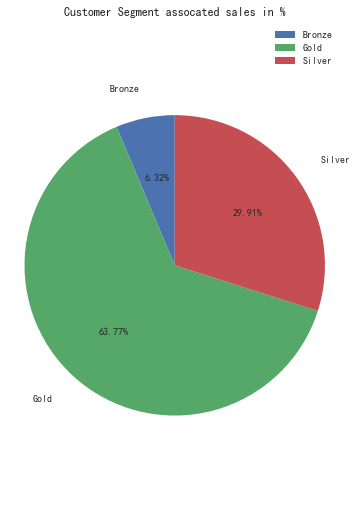

In [236]:
#pie figure
fig=plt.figure(figsize=(6,9))
test=customer_sales_rfm
# labels = [u'cluster0',u'cluster1',u'cluster2']
labels = customer_sales_rfm.index
# colors=['red','yellow','green']
patches,text1,text2 = plt.pie(test,
                      labels=labels,
#                       colors=colors,
                      autopct = '%3.2f%%',
                      labeldistance = 1.2,
                      shadow=False,
                      startangle=90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.title('Customer Segment assocated sales in %')
plt.show()
fig.savefig('segmentSales.png')

Kmeans聚类：价值用户cluster2占比只有42.06%却贡献了86.93%的销售额，是业务的重点发展对象。

RFM聚类：价值用户Gold占比只有32.7%却贡献了63.77%的销售额，是业务的重点发展对象。

为了挖掘价值用户，我们使用了两种方法，第一个方法是利用RFM模型对用户进行评分分组，第二个方法是利用K-Means算法对用户进行“机器学习”分组，两种方法都挖掘出价值用户，比较两种方法得出的用户画像结果，K-Means方法得出的结果更好一些，最终挖掘出的价值用户占比只有42.06%却贡献了86.93%的销售额.

确定价值用户之后可以进一步学习价值用户的消费习惯，从而提供以消费者为中心的智能商业模式，根据实际应用情况进行多次迭代来优化价值用户挖掘的模型。

#kmeans绘图

In [208]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

In [209]:
# df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= rfm_k3['Recency'],
    y= rfm_k3['Frequency'],
    z= rfm_k3['Monetary'],
    mode='markers',
     marker=dict(
        color = rfm_k3['k_cluster'], 
        size= 10,
        line=dict(
            color= rfm_k3['k_cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Recency'),
            yaxis = dict(title  = 'Frequency'),
            zaxis = dict(title  = 'Monetary')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)